# **NETFLIX ORIGINALS**
---

In [827]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

from scipy.stats import kstest
from scipy.stats import kruskal


## **LATAR BELAKANG**
---
    Netflix merupakan perusahaan penyedia layanan streaming media digital. Bisnis utama dari perusahaan ini adalah streaming berlangganan yang menawarkan film dan program televisi, termasuk program yang dibuat oleh Netflix sendiri. Netflix memungkinkan penggunanya dapat menonton sebuah film atau program televisi tanpa iklan di perangkat yang tersambung ke internet. Netflix menyediakan berbagai film dan program televisi yang dapat diunduh ke perangkat iOS, Android, atau Windows untuk layanan menonton tanpa koneksi internet. Netflix Original merupakan film atau program acara yang di danai langsung oleh Netflix dan hak ciptanya dimiliki oleh Netflix. Netflix Original hanya tayang di Netflix dan dibuat dengan kualitas yang bagus.

    Analisis data merupakan proses pemeriksaan data, pembersihan data, dan pemodelan data dengan tujuan menemukan informasi yang berguna. Analisis data berfungsi untuk menginformasikan kesimpulan dan mendukung proses pengambilan keputusan dengan menggunakan beragam teknik.

## **PERMASALAHAN**
    1. Apakah ada kesalahan investasi perusahaan Netflix terhadap Filmnya?
    2. Apa film selanjutnya yang akan di investasikan oleh Netflix?

## **TUJUAN**
---
    Seorang data analyst membantu perusahaan Netflix, untuk:
    1. Menemukan pola di antara kumpulan data
    2. Mengevaluasi film yang sudah rilis 
    3. Memprediksi tren film yang mungkin terjadi di masa depan.

## **PROSES ANALISA DATA NETFLIX ORIGINALS**
---

### (1) Mengambil data Netflix Originals
    Pada proses ini, dilakukan pengambilan dataset Netflix Originals untuk dilakukan pemeriksaan data mentah.

In [828]:
df = pd.read_csv('Netflix Originals.csv')
df.head()

,Unnamed: 0,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,0,#REALITYHIGH,Comedy,8-Sep-17,99,5.2,English
1,1,13th,Documentary,7-Oct-16,100,8.2,English
2,2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,26-Jan-17,36,7.1,English
3,3,15-Aug,Comedy-drama,29-Mar-19,124,5.8,Marathi
4,4,1922,Horror/Crime drama,20-Oct-17,102,6.3,English


In [829]:
df.shape

(584, 7)

In [830]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,584,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,Title,584,"[#REALITYHIGH, 13th, 13th: A Conversation with Oprah Winfrey & Ava DuVernay, 15-Aug, 1922, 22-Jul, 5 Star Christmas, 6 Balloons, 6 Underground, 7 años, A 3 Minute Hug, A Babysitter's Guide to Monster Hunting, A California Christmas, A Christmas Prince, A Christmas Prince: The Royal Baby, A Christmas Prince: The Royal Wedding, A Fall from Grace, A Futile and Stupid Gesture, A Life of Speed: The Juan Manuel Fangio Story, A Love Song for Latasha, A Secret Love, A Tale of Two Kitchens, A Very Murray Christmas, A Week Away, A Whisker Away, After Maria, After the Raid, Airplane Mode, Ajeeb Daastaans, AK vs AK, Alex Strangelove, Alien Xmas, All Because of You, All Day and a Night, All in My Family, All the Bright Places, All Together Now, Altered Carbon: Resleeved, Always Be My Maybe, Amanda Knox, Amateur, American Factory, American Factory: A Conversation with the Obamas , American Murder: The Family Next Door, American Son, Anelka: Misunderstood, Angela's Christmas, Angela's Christmas Wish, Anima, Antoine Griezmann: The Making of a Legend, Apostle, Ariana Grande: Excuse Me, I Love You, Arlo the Alligator Boy, Army of the Dead, ARQ, Athlete A, Audrie & Daisy, Back to School, Bad Trip, Baggio: The Divine Ponytail, Barbra: The Music, The Mem'ries, The Magic!, Barry, Beasts of No Nation, Beats, Becoming, Been So Long, Below Zero, Ben Platt: Live from Radio City Music Hall, Benji, Between Two Ferns: The Movie, Bigflo & Oil: Hip Hop Frenzy, Biggie: I Got a Story to Tell, Bikram: Yogi, Guru, Predator, Bird Box, Birders, Blackpink: Light Up the Sky, Blame!, Blue Miracle, Bomb Scared, Brahman Naman, Brene Brown: The Call to Courage, Bright, Bulbbul, Burning Sands, Cadaver, Calibre, Cam, Candy Jar, Canvas , Cargo, Casting JonBenet, Caught by a Wave, Chadwick Boseman: Portrait of an Artist, Chasing Coral , Choked: Paisa Bolta Hai, Chopsticks, Christmas Crossfire, Christmas Inheritance, Circus of Books, Citation, ...]"
2,Genre,115,"[Comedy, Documentary, Aftershow / Interview, Comedy-drama, Horror/Crime drama, Drama, Action, Comedy/Fantasy/Family, Romantic comedy, Thriller, Biographical/Comedy, Comedy / Musical, Christian musical, Anime/Fantasy, Stop Motion, Action comedy, Romance, Anime/Science fiction, Sports-drama, Animation, Musical / Short, Horror-thriller, Concert Film, Animated musical comedy, Zombie/Heist, Science fiction/Thriller, Hidden-camera prank comedy, Biopic, War drama, Musical, Family film, Psychological thriller, Black comedy, Urban fantasy, Horror, Psychological horror, Animation / Short, Drama/Horror, Romantic teen drama, Romantic drama, Heist, Musical comedy, Family, Horror thriller, Mentalism special, Christmas musical, Teen comedy-drama, Mystery, Dark comedy, Crime drama, Animation/Superhero, Family/Comedy-drama, Mockumentary, Supernatural drama, Action/Comedy, Horror anthology, Romantic comedy/Holiday, Adventure-romance, Action-thriller, Animation / Science Fiction, Science fiction/Drama, Family/Christmas musical, Variety show, Animation/Christmas/Comedy/Adventure, Comedy horror, One-man show, Anthology/Dark comedy, Variety Show, Adventure, Comedy mystery, Science fiction/Mystery, Action-adventure, Historical-epic, Action/Science fiction, Animation/Musical/Adventure, Science fiction thriller, Drama-Comedy, Musical/Western/Fantasy, Romance drama, Superhero, Romantic thriller, Psychological thriller drama, Science fiction adventure, Satire, Making-of, Animation / Comedy, War, Science fiction, Coming-of-age comedy-drama, Crime thriller, Romantic comedy-drama, A

Hasil dari proses pengambilan data Netflix Original. Ditemukan beberapa informasi, yaitu:

1. Dataset memiliki 584 baris dan 7 kolom.
<br><br>
2. Mendapatkan informasi dari kolom yang ada, yaitu:
    - Unnamed: 0, memiliki 584 nilai unique.
    - Title, memiliki 584 nilai unique.
    - Genre, memiliki 115 nilai unique.
    - Premiere, memiliki 390 nilai unique.
    - Runtime, memiliki 124 nilai unique.
    - IMDB Score, memiliki 54 nilai unique.
    - Language, memiliki 38 nilai unique.
<br><br>
3. Fungsi dari kolom, yaitu:
    - Unnamed: 0, tidak memiliki fungsi sehingga perlu dipertimbangkan untuk menghapus kolom.
    - Title, memiliki fungsi untuk menyimpan data nama dari film.
    - Genre, memiliki fungsi untuk mengelompokan film berdasarkan kategori.
    - Premiere, memiliki fungsi untuk menginformasikan tanggal rilis film.
    - Runtime, memiliki fungsi untuk menginformasikan durasi tayang film.
    - IMDB Score, memiliki fungsi untuk menginformasikan nilai yang diberikan untuk film.
    - Language, memiliki fungsi untuk menginformasikan bahasa yang digunakan pada film. 
---  

### (2) Memeriksa nilai unique dari data Netflix Originals
    Pada proses ini dilakukan pemeriksaan nilai unique dari tiap kolom pada data Netflix Originals

In [831]:
df['Title'].unique()

array(['#REALITYHIGH', '13th',
       '13th: A Conversation with Oprah Winfrey & Ava DuVernay', '15-Aug',
       '1922', '22-Jul', '5 Star Christmas', '6 Balloons',
       '6 Underground', '7 años', 'A 3 Minute Hug',
       "A Babysitter's Guide to Monster Hunting",
       'A California Christmas', 'A Christmas Prince',
       'A Christmas Prince: The Royal Baby',
       'A Christmas Prince: The Royal Wedding', 'A Fall from Grace',
       'A Futile and Stupid Gesture',
       'A Life of Speed: The Juan Manuel Fangio Story',
       'A Love Song for Latasha', 'A Secret Love',
       'A Tale of Two Kitchens', 'A Very Murray Christmas', 'A Week Away',
       'A Whisker Away', 'After Maria', 'After the Raid', 'Airplane Mode',
       'Ajeeb Daastaans', 'AK vs AK', 'Alex Strangelove', 'Alien Xmas',
       'All Because of You', 'All Day and a Night', 'All in My Family',
       'All the Bright Places', 'All Together Now',
       'Altered Carbon: Resleeved', 'Always Be My Maybe', 'Amanda Knox',


In [832]:
df['Genre'].nunique()

115

In [833]:
df['Genre'].unique()

array(['Comedy', 'Documentary', 'Aftershow / Interview', 'Comedy-drama',
       'Horror/Crime drama', 'Drama', 'Action', 'Comedy/Fantasy/Family',
       'Romantic comedy', 'Thriller', 'Biographical/Comedy',
       'Comedy / Musical', 'Christian musical', 'Anime/Fantasy',
       'Stop Motion', 'Action comedy', 'Romance', 'Anime/Science fiction',
       'Sports-drama', 'Animation', 'Musical / Short', 'Horror-thriller',
       'Concert Film', 'Animated musical comedy', 'Zombie/Heist',
       'Science fiction/Thriller', 'Hidden-camera prank comedy', 'Biopic',
       'War drama', 'Musical', 'Family film', 'Psychological thriller',
       'Black comedy', 'Urban fantasy', 'Horror', 'Psychological horror',
       'Animation / Short', 'Drama/Horror', 'Romantic teen drama',
       'Romantic drama', 'Heist', 'Musical comedy', 'Family',
       'Horror thriller', 'Mentalism special', 'Christmas musical',
       'Teen comedy-drama', 'Mystery', 'Dark comedy', 'Crime drama',
       'Animation/Superher

In [834]:
df['Premiere'].unique()

array(['8-Sep-17', '7-Oct-16', '26-Jan-17', '29-Mar-19', '20-Oct-17',
       '10-Oct-18', '7-Dec-18', '6-Apr-18', '13-Dec-19', '28-Oct-16',
       '28-Oct-19', '15-Oct-20', '14-Dec-20', '17-Nov-17', '5-Dec-19',
       '30-Nov-18', '17-Jan-20', '26-Jan-18', '20-Mar-20', '21-Sep-20',
       '29-Apr-20', '22-May-19', '4-Dec-15', '26-Mar-21', '18-Jun-20',
       '24-May-19', '19-Dec-19', '23-Jan-20', '16-Apr-21', '24-Dec-20',
       '8-Jun-18', '20-Nov-20', '1-Oct-20', '1-May-20', '3-May-19',
       '28-Feb-20', '28-Aug-20', '19-Mar-20', '31-May-19', '30-Sep-16',
       '21-Aug-19', '30-Sep-20', '1-Nov-19', '5-Aug-20', '1-Dec-20',
       '27-Jun-19', '21-Mar-19', '12-Oct-18', '21-Dec-20', '21-May-21',
       '16-Sep-16', '24-Jun-20', '23-Sep-16', '30-Aug-19', '26-May-21',
       '22-Nov-17', '16-Dec-16', '16-Oct-15', '19-Jun-19', '6-May-20',
       '26-Oct-18', '29-Jan-21', '20-May-20', '16-Mar-18', '20-Sep-19',
       '8-Oct-20', '1-Mar-21', '20-Nov-19', '21-Dec-18', '25-Sep-19',
       '

In [835]:
df['Runtime'].unique()

array([ 99, 100,  36, 124, 102, 144,  95,  75, 128,  76,  28,  98, 107,
        92,  85, 120, 101,  19,  82,  30,  56,  97, 104,  37,  25,  96,
       142, 108,  42, 121,  39,  93,  74, 110,  10,  90,  94,  47,  15,
        60, 129, 148,  88,  83,  86, 136,  89, 106,  87,  79, 117,   9,
        80,  21, 114, 151, 112, 111,   7,  91, 155,  51,  81,  70,  49,
        78, 118,  55, 103, 147,  73,  40,  58, 123,  24, 105,  32, 125,
       119,  64, 137,  84, 113,  14, 134,  12, 115, 116,  71, 126,  16,
        63, 109, 133, 149,  31, 132,  54,  72,  23, 139,  34,  26,  46,
        44,  48,  57,  27,  45,  52, 135,  41, 131,   4, 153,  17, 138,
       209, 140,  53, 122, 130,  13,  11], dtype=int64)

In [836]:
df['IMDB Score'].unique()

array([5.2, 8.2, 7.1, 5.8, 6.3, 6.8, 4.6, 5.9, 6.1, 6.5, 5.4, 5.3, 7.9,
       5.5, 5.7, 6.7, 4.3, 5. , 6.9, 6.2, 4.2, 7.4, 7.2, 6.4, 7.7, 7.6,
       6.6, 7.5, 8.4, 5.6, 5.1, 8.1, 4.8, 6. , 8.3, 2.6, 9. , 4.4, 7.3,
       3.5, 4.9, 8.6, 2.5, 4.5, 7. , 4.7, nan, 7.8, 3.4, 3.7, 3.9, 4.1,
       8.5, 8. , 3.2])

In [837]:
df['Language'].unique()

array(['English', 'Marathi', 'Italian', 'Spanish', 'English/Spanish',
       'Japanese', 'Portuguese', 'Hindi', 'Malay', 'English/Mandarin',
       'French', 'English/Akan', 'Korean', 'Spanish/Basque', 'Norwegian',
       'German', 'Indonesian', 'Filipino', 'English/Japanese', 'Dutch',
       'Khmer/English/French', 'Thai', 'Turkish', 'Thia/English',
       'English/Hindi', 'English/Swedish', 'Spanish/English', 'Polish',
       'English/Korean', 'Swedish', 'Bengali', 'English/Arabic', 'Tamil',
       'English/Russian', 'Georgian', 'English/Taiwanese/Mandarin',
       'Spanish/Catalan', 'English/Ukranian/Russian'], dtype=object)

Hasil dari proses pemeriksaan nilai unique pada dataset Netflix Original. Didapatkan beberapa informasi, yaitu:

1. Kolom Title: Perlu dilakukan pemeriksaan untuk beberapa judul yang sedikit aneh, apakah benar ada film seperti judul yang tertulis pada data.
    contoh: 15-Aug, 1922, 22-Jul, 7 años, ARQ, XOXO, dll.
    
2. Kolom Genre: Perlu dilakukan pemisahan genre dari beberapa film yang memiliki genre lebih dari 1, dan perlu dilakukan pengelompokkan genre.
    contoh: Anime/Science fiction, Comedy/Fantasy/Family, Action comedy, dll.

3. Kolom Premiere: Perlu dilakukan penyamaan format penulisan tanggal.
    contoh: July 15. 2016, October 16. 2019, dll.

4. Kolom Runtime: Tidak ditemukan keanehan dari dataset.

5. Kolom IMDB Score: Perlu dilakukan pemeriksaan dari data yang memiliki nilai nan.

6. Kolom Language: Perlu dilakukan pemeriksaan dari beberapa bahasa, dan pemisahan bahasa dari beberapa film yang memiliki bahasa lebih dari 1.
    contoh: Marathi, Bengali, English/Japanese, English/Taiwanese/Mandarin, dll.

---

### (3) Memeriksa beberapa informasi dari data Netflix Originals
    Pada proses ini dilakukan pemeriksaan informasi dari data Netflixs Original, seperti nilai kosong, data duplikat dan tipe data dari tiap kolom.

In [838]:
df.duplicated().sum()
# Tidak ditemukan data duplikat

0

In [839]:
# Pemeriksaan data type dari tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  584 non-null    int64  
 1   Title       584 non-null    object 
 2   Genre       584 non-null    object 
 3   Premiere    584 non-null    object 
 4   Runtime     584 non-null    int64  
 5   IMDB Score  580 non-null    float64
 6   Language    584 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 32.1+ KB


In [840]:
# Pemeriksaan nilai kosong
df.isna().sum()

Unnamed: 0    0
Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    4
Language      0
dtype: int64

Hasil dari proses pemeriksaan informasi dari data Netflix Original. Ditemukan beberapa informasi, yaitu:

1. Terdapat kolom yang tidak perlu digunakan, yaitu Unnamed: 0.

2. Terdapat kesalahan format tipe data pada kolom Premiere.

3. Terdapat kekosongan data pada kolom IMDB Score.

4. Tidak terdapat data yang sama.
---

## **PROSES PEMBERSIHAN DATA**
---

### (1) Menghapus kolom yang tidak diperlukan
    Pada proses ini dilakukan penghapusan kolom yang tidak diperlukan

In [841]:
df = df.drop(columns = ['Unnamed: 0'])
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,#REALITYHIGH,Comedy,8-Sep-17,99,5.2,English
1,13th,Documentary,7-Oct-16,100,8.2,English
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,26-Jan-17,36,7.1,English
3,15-Aug,Comedy-drama,29-Mar-19,124,5.8,Marathi
4,1922,Horror/Crime drama,20-Oct-17,102,6.3,English
...,...,...,...,...,...,...
579,XOXO,Drama,26-Aug-16,92,5.3,English
580,Yeh Ballet,Drama,21-Feb-20,117,7.6,Hindi
581,Yes Day,Comedy,12-Mar-21,86,5.7,English
582,You've Got This,Romantic comedy,2-Oct-20,111,5.8,Spanish


Hasil dari proses menghapus kolom, yaitu:
1. Menghapus kolom Unnamed: 0, yang tidak diperlukan karena fungsi yang sama dari nomor index.
---

### (2) Mengisi data yang kosong
    Pada proses ini dilakukan pengisian terhadap data kosong yang ditemukan pada proses pemeriksaan data.


In [842]:
# Menampilkan data IMDB Score yang kosong
df.loc[df['IMDB Score'].isna()]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
189,Guilty,Thriller,6-Mar-20,119,NaN,Hindi
332,Paris Is Us,Romance drama,22-Feb-19,83,NaN,French
365,Rim of the World,Science fiction adventure,24-May-19,98,NaN,English
569,What Would Sophia Loren Do?,Documentary,15-Jan-21,32,NaN,English


In [843]:
# Melakukan Pengisian IMDB Score yang NaN
df.loc[df['Title'] == 'Guilty', 'IMDB Score'] = df.loc[df['Title'] == 'Guilty', 'IMDB Score'].fillna(5.4)
df.loc[df['Title'] == 'Paris Is Us', 'IMDB Score'] = df.loc[df['Title'] == 'Paris Is Us', 'IMDB Score'].fillna(4.6)
df.loc[df['Title'] == 'Rim of the World', 'IMDB Score'] = df.loc[df['Title'] == 'Rim of the World', 'IMDB Score'].fillna(5.2)
df.loc[df['Title'] == 'What Would Sophia Loren Do?', 'IMDB Score'] = df.loc[df['Title'] == 'What Would Sophia Loren Do?', 'IMDB Score'].fillna(6.6)

In [844]:
# Pemeriksaan apakah data kosong sudah terisi sesuai dengan nilai yang dimasukkan
df.loc[[189,332,365,569]]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
189,Guilty,Thriller,6-Mar-20,119,5.4,Hindi
332,Paris Is Us,Romance drama,22-Feb-19,83,4.6,French
365,Rim of the World,Science fiction adventure,24-May-19,98,5.2,English
569,What Would Sophia Loren Do?,Documentary,15-Jan-21,32,6.6,English


In [845]:
# Nilai kosong telah hilang
df.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

Hasil dari proses pengisian data kosong, yaitu:

1. Terdapat 4 nilai IMDB Score yang kosong berdasarkan pemeriksaan data.
<br><br>
2. Setelah ditampilkan ternyata ditemukan baris IMDB Score yang kosong, yaitu:
    - Index 189 dengan title Guilty
    - Index 332 dengan title Paris Is Us
    - Index 365 dengan title Rim of the World
    - Index 569 dengan title What Would Sophia Loren Do?
<br><br>
3. Nilai IMDB Score yang kosong, diisi dengan score sebenarnya yang didapatkan dari website IMDB (https://www.imdb.com/)
---

REFERENSI PENGISIAN DATA
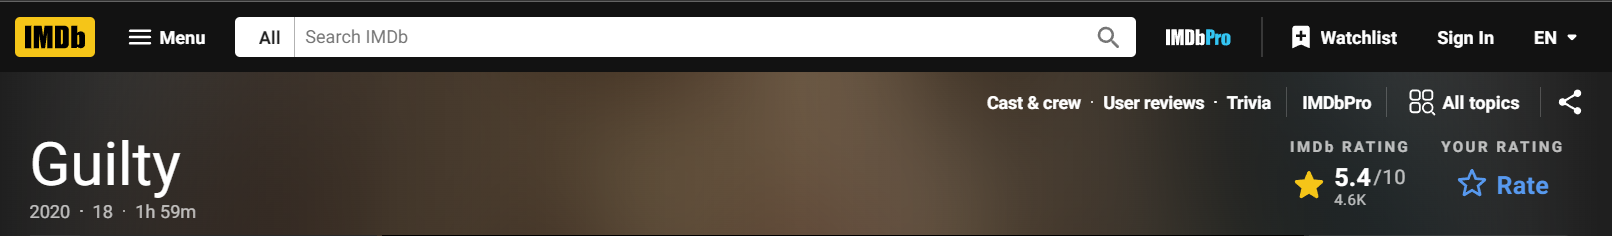
---

### (3) Mengubah format dan tipe data kolom Premiere
    Pada proses ini dilakukan perubahan format dan tipe data dari kolom Premiere seperti yang ditemukan dari proses pemeriksaan data.

In [846]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,#REALITYHIGH,Comedy,8-Sep-17,99,5.2,English
1,13th,Documentary,7-Oct-16,100,8.2,English
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,26-Jan-17,36,7.1,English
3,15-Aug,Comedy-drama,29-Mar-19,124,5.8,Marathi
4,1922,Horror/Crime drama,20-Oct-17,102,6.3,English


In [847]:
# Melakukan pemisahan dengan parameter simbol '-'
df[['Tanggal', 'Bulan', 'Tahun']] = df['Premiere'].str.split('-', expand=True)
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Tanggal,Bulan,Tahun
0,#REALITYHIGH,Comedy,8-Sep-17,99,5.2,English,8,Sep,17
1,13th,Documentary,7-Oct-16,100,8.2,English,7,Oct,16
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,26-Jan-17,36,7.1,English,26,Jan,17
3,15-Aug,Comedy-drama,29-Mar-19,124,5.8,Marathi,29,Mar,19
4,1922,Horror/Crime drama,20-Oct-17,102,6.3,English,20,Oct,17


In [848]:
df.loc[df['Bulan'].isna()]
# Setelah dilakukan pemeriksaan ternyata terdapat format penulisan berbeda, yaitu October 16. 2019

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Tanggal,Bulan,Tahun
181,Ghosts of Sugar Land,Documentary,October 16. 2019,21,5.5,English,October 16. 2019,None,None
235,Joan Didion: The Center Will Not Hold,Documentary,October 27. 2017,98,7.5,English,October 27. 2017,None,None
418,Strong Island,Documentary,September 15. 2017,107,6.4,English,September 15. 2017,None,None
528,The White Helmets,Documentary,September 16. 2016,40,7.5,English,September 16. 2016,None,None
545,Tony Robbins: I Am Not Your Guru,Documentary,July 15. 2016,116,6.7,English,July 15. 2016,None,None


In [849]:
df['Premiere'] = pd.to_datetime(df['Premiere'], dayfirst=True, errors='coerce')

# dayfirst=True untuk mengatasi format hari-bulan-tahun
# errors='coerce' untuk mengatasi format yang salah dari tanggal dan mengubah ke nilai NaT(Not a Time) 

In [850]:
# Pemeriksaan format Premiere pada baris tertentu yang format aslinya October 16. 2019, apakah sudah berubah menjadi 2019-10-16
df.loc[[181,235,418,528,545]]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Tanggal,Bulan,Tahun
181,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English,October 16. 2019,None,None
235,Joan Didion: The Center Will Not Hold,Documentary,2017-10-27,98,7.5,English,October 27. 2017,None,None
418,Strong Island,Documentary,2017-09-15,107,6.4,English,September 15. 2017,None,None
528,The White Helmets,Documentary,2016-09-16,40,7.5,English,September 16. 2016,None,None
545,Tony Robbins: I Am Not Your Guru,Documentary,2016-07-15,116,6.7,English,July 15. 2016,None,None


In [851]:
df = df.drop(columns = ['Tanggal','Bulan','Tahun'])
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English
1,13th,Documentary,2016-10-07,100,8.2,English
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,2017-01-26,36,7.1,English
3,15-Aug,Comedy-drama,2019-03-29,124,5.8,Marathi
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English
...,...,...,...,...,...,...
579,XOXO,Drama,2016-08-26,92,5.3,English
580,Yeh Ballet,Drama,2020-02-21,117,7.6,Hindi
581,Yes Day,Comedy,2021-03-12,86,5.7,English
582,You've Got This,Romantic comedy,2020-10-02,111,5.8,Spanish


In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


Hasil dari proses mengubah format dan tipe data, yaitu:

1. Melakukan pemisahan nilai dengan parameter '-', namun tidak berhasil dilakukan ke semua baris karena ditemukannya format berbeda yaitu October 27. 2017.
2. Mengatasi format yang berbeda dengan parameter errors='coerce' untuk mengubah nilai ke NaT (Not a Time).
3. Mengubah tipe data dari kolom Premiere dari object menjadi datetime64.
4. Hasil akhir format Premiere yaitu Tahun-Bulan-Tanggal dengan tipe data datetime.
---

### (4) Pemisahan bahasa dari kolom Language
    Pada proses ini dilakukan pemisahan jumlah bahasa bahasa sesuai dengan hasil yang didapatkan dari proses pemeriksaan data. Proses ini dilakukan karena terdapat film yang memiliki lebih dari 1 bahasa.

In [853]:
df['Language'].value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
English/Spanish                 5
Turkish                         5
Polish                          3
Marathi                         3
Dutch                           3
Filipino                        2
English/Japanese                2
Thai                            2
English/Mandarin                2
English/Hindi                   2
Norwegian                       1
Swedish                         1
Spanish/Catalan                 1
English/Taiwanese/Mandarin      1
Georgian                        1
English/Russian                 1
Tamil                           1
English/Arabic                  1
Bengali                         1
Spanish/Englis

In [854]:
# Melakukan pemisahan dengan parameter simbol '/'
df[['Language1', 'Language2', 'Language3']] = df['Language'].str.split('/', expand=True)
df.head()

# Film yang memiliki bahasa lebih dari 1 yang tadinya tergabung menjadi 1 kolom telah terpisah

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Language1,Language2,Language3
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,English,None,None
1,13th,Documentary,2016-10-07,100,8.2,English,English,None,None
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,2017-01-26,36,7.1,English,English,None,None
3,15-Aug,Comedy-drama,2019-03-29,124,5.8,Marathi,Marathi,None,None
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,English,None,None


In [855]:
# Pemeriksaan value dari kolom Language1
df['Language1'].value_counts()

English       419
Spanish        34
Hindi          33
French         20
Italian        14
Portuguese     12
Indonesian      9
Korean          6
Japanese        6
German          5
Turkish         5
Marathi         3
Dutch           3
Polish          3
Filipino        2
Thai            2
Malay           1
Swedish         1
Tamil           1
Bengali         1
Khmer           1
Thia            1
Norwegian       1
Georgian        1
Name: Language1, dtype: int64

In [856]:
# Dilakukan pemeriksaan beberapa data bahasa dari kolom Language1 
# Code ini hanya sample

df[df['Language1'] == 'Georgian']

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Language1,Language2,Language3
524,The Trader,Documentary,2018-02-09,23,6.8,Georgian,Georgian,None,None


In [857]:
# Setelah dilakukan pemeriksaan ternyata 'Thia' adalah kesalahan penulisan dari 'Thai'

df['Language1'] = df['Language1'].replace('Thia', 'Thai')
df[df['Language1'] == 'Thai']

# Film Hope Frozen: A Quest to Live Twice sudah masuk ke dalam bahasa Thai

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Language1,Language2,Language3
179,Ghost Lab,Horror,2021-05-26,117,5.2,Thai,Thai,None,None
205,Hope Frozen: A Quest to Live Twice,Documentary,2020-09-15,80,6.7,Thia/English,Thai,English,None
316,One Take,Documentary,2020-06-18,85,5.7,Thai,Thai,None,None


In [858]:
# Pemeriksaan value dari kolom Language2
df['Language2'].value_counts()

Spanish      5
English      3
Mandarin     2
Japanese     2
Hindi        2
Akan         1
Basque       1
Swedish      1
Korean       1
Arabic       1
Russian      1
Taiwanese    1
Catalan      1
Ukranian     1
Name: Language2, dtype: int64

In [859]:
# Dilakukan pemeriksaan beberapa data bahasa dari kolom Language2 
# Code ini hanya sample

df[df['Language2'] == 'Russian']

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Language1,Language2,Language3
428,Team Foxcatcher,Documentary,2016-04-29,90,7.3,English/Russian,English,Russian,None


In [860]:
# Pemeriksaan value dari kolom Language3
df['Language3'].value_counts()

French      1
Mandarin    1
Russian     1
Name: Language3, dtype: int64

In [861]:
df.isna().sum()
# Pemeriksaan kolom baru, ternyata terdapat banyak terdapat nilai kosong.

Title           0
Genre           0
Premiere        0
Runtime         0
IMDB Score      0
Language        0
Language1       0
Language2     561
Language3     581
dtype: int64

In [862]:
df['Language2'] = df['Language2'].fillna('-')
df['Language3'] = df['Language3'].fillna('-')
df.head()

# Keputusan untuk mengisi data bahasa yang kosong dengan menggunakan simbol '-'

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Language1,Language2,Language3
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,English,-,-
1,13th,Documentary,2016-10-07,100,8.2,English,English,-,-
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,2017-01-26,36,7.1,English,English,-,-
3,15-Aug,Comedy-drama,2019-03-29,124,5.8,Marathi,Marathi,-,-
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,English,-,-


In [863]:
# Menghapus kolom Language yang sudah tidak terpakai, karena digantikan dengan kolom baru yang nilainya sudah terpisah
df = df.drop(columns = ['Language'])
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,-,-
1,13th,Documentary,2016-10-07,100,8.2,English,-,-
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,2017-01-26,36,7.1,English,-,-
3,15-Aug,Comedy-drama,2019-03-29,124,5.8,Marathi,-,-
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,-,-


In [864]:
df.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language1     0
Language2     0
Language3     0
dtype: int64

Hasil dari proses pemisahan bahasa, yaitu:
1. Membagi bahasa menjadi 3 kolom, yaitu Language1, Language2, dan Language3.
2. Language1 merupakan bahasa asal film tersebut dibuat.
3. Language2 dan Language3 merupakan bahasa pendukung dari persebaran penonton film. co: Subtitle/Dubbing
---

### (5) Pengolahan Genre
    Pada proses ini dilakukan pengolahan kolom genre, mulai dari pemisahan nilai, pengelompokan nilai, dan lainnya

In [865]:
# Melihat nilai unique pada kolom Genre
df['Genre'].unique()

array(['Comedy', 'Documentary', 'Aftershow / Interview', 'Comedy-drama',
       'Horror/Crime drama', 'Drama', 'Action', 'Comedy/Fantasy/Family',
       'Romantic comedy', 'Thriller', 'Biographical/Comedy',
       'Comedy / Musical', 'Christian musical', 'Anime/Fantasy',
       'Stop Motion', 'Action comedy', 'Romance', 'Anime/Science fiction',
       'Sports-drama', 'Animation', 'Musical / Short', 'Horror-thriller',
       'Concert Film', 'Animated musical comedy', 'Zombie/Heist',
       'Science fiction/Thriller', 'Hidden-camera prank comedy', 'Biopic',
       'War drama', 'Musical', 'Family film', 'Psychological thriller',
       'Black comedy', 'Urban fantasy', 'Horror', 'Psychological horror',
       'Animation / Short', 'Drama/Horror', 'Romantic teen drama',
       'Romantic drama', 'Heist', 'Musical comedy', 'Family',
       'Horror thriller', 'Mentalism special', 'Christmas musical',
       'Teen comedy-drama', 'Mystery', 'Dark comedy', 'Crime drama',
       'Animation/Superher

In [866]:
df['Genre'] = df['Genre'].replace(['Comedy', 'Documentary', 'Aftershow / Interview', 'Comedy-drama',
       'Horror/Crime drama', 'Drama', 'Action', 'Comedy/Fantasy/Family',
       'Romantic comedy', 'Thriller', 'Biographical/Comedy',
       'Comedy / Musical', 'Christian musical', 'Anime/Fantasy',
       'Stop Motion', 'Action comedy', 'Romance', 'Anime/Science fiction',
       'Sports-drama', 'Animation', 'Musical / Short', 'Horror-thriller',
       'Concert Film', 'Animated musical comedy', 'Zombie/Heist',
       'Science fiction/Thriller', 'Hidden-camera prank comedy', 'Biopic',
       'War drama', 'Musical', 'Family film', 'Psychological thriller',
       'Black comedy', 'Urban fantasy', 'Horror', 'Psychological horror',
       'Animation / Short', 'Drama/Horror', 'Romantic teen drama',
       'Romantic drama', 'Heist', 'Musical comedy', 'Family',
       'Horror thriller', 'Mentalism special', 'Christmas musical',
       'Teen comedy-drama', 'Mystery', 'Dark comedy', 'Crime drama',
       'Animation/Superhero', 'Family/Comedy-drama', 'Mockumentary',
       'Supernatural drama', 'Action/Comedy', 'Horror anthology',
       'Romantic comedy/Holiday', 'Adventure-romance', 'Action-thriller',
       'Animation / Science Fiction', 'Science fiction/Drama',
       'Family/Christmas musical', 'Variety show',
       'Animation/Christmas/Comedy/Adventure', 'Comedy horror',
       'One-man show', 'Anthology/Dark comedy', 'Variety Show',
       'Adventure', 'Comedy mystery', 'Science fiction/Mystery',
       'Action-adventure', 'Historical-epic', 'Action/Science fiction',
       'Animation/Musical/Adventure', 'Science fiction thriller',
       'Drama-Comedy', 'Musical/Western/Fantasy', 'Romance drama',
       'Superhero', 'Romantic thriller', 'Psychological thriller drama',
       'Science fiction adventure', 'Satire', 'Making-of',
       'Animation / Comedy', 'War', 'Science fiction',
       'Coming-of-age comedy-drama', 'Crime thriller',
       'Romantic comedy-drama', 'Anime / Short', 'Science fiction/Action',
       'Animation / Musicial', 'Spy thriller', 'Teen comedy horror',
       'Comedy/Horror', 'Western', 'Christmas/Fantasy/Adventure/Comedy',
       'Christmas comedy', 'Fantasy', 'Historical drama',
       'Heist film/Thriller', 'Political thriller', 'Adventure/Comedy',
       'Superhero/Action', 'Animation/Comedy/Adventure',
       'Superhero-Comedy', 'Sports film', 'Romantic teenage drama',
       'Horror comedy', 'War-Comedy', 'Drama / Short', 'Action thriller',
       'Dance comedy'], ['Comedy', 'Documentary', 'Documentary/Short', 'Comedy/Drama',
       'Crime/Drama/Horror', 'Drama', 'Action', 'Comedy/Fantasy/Family',
       'Comedy/Romance', 'Thriller', 'Biography/Comedy',
       'Comedy/Musical', 'Musical', 'Animation/Drama/Fantasy/Romance',
       'Animation/Adventure/Comedy/Short', 'Action/Comedy', 'Romance', 'Animation/Action/Drama/Sci-Fi',
       'Drama/Sports', 'Animation', 'Musical/Short', 'Horror/Thriller',
       'Musical', 'Animation/Comedy/Musical', 'Action/Crime/Drama/Horror',
       'Sci-Fi/Thriller', 'Comedy', 'Biography',
       'Drama/War', 'Musical', 'Family', 'Thriller',
       'Comedy', 'Fantasy', 'Horror', 'Horror',
       'Animation/Short', 'Drama/Horror', 'Drama/Romance',
       'Drama/Romance', 'Crime/Drama/Thriller', 'Comedy/Musical', 'Family',
       'Horror/Thriller', 'Reality-TV', 'Comedy/Musical/Family',
       'Comedy/Drama', 'Drama/Mystery/Thriller', 'Comedy', 'Crime/Drama',
       'Animation/Comedy/Family/Sci-Fi', 'Comedy/Drama/Family', 'Comedy',
       'Action/Drama/Fantasy/Sci-Fi', 'Action/Comedy', 'Horror',
       'Comedy/Romance', 'Adventure/Romance', 'Action/Thriller',
       'Animation/Sci-Fi', 'Drama/Sci-Fi',
       'Fantasy/Family/Musical', 'Comedy',
       'Animation/Adventure/Comedy/Family', 'Comedy/Horror',
       'One-man show', 'Action/Comedy/Crime/Drama', 'Comedy/Musical/Romance',
       'Adventure', 'Comedy/Mystery', 'Sci-Fi/Mystery',
       'Action/Adventure', 'Action/Biography/Drama/War', 'Action/Sci-Fi',
       'Animation/Adventure/Musical', 'Sci-Fi/Thriller',
       'Comedy/Drama', 'Fantasy/Musical', 'Drama/Romance',
       'Action/Crime/Sci-Fi/Thriller', 'Romance/Thriller', 'Drama/Thriller',
       'Adventure/Sci-Fi', 'Comedy', 'Documentary',
       'Animation/Comedy', 'Action/Drama/War', 'Sci-Fi',
       'Comedy/Drama', 'Crime/Thriller',
       'Comedy/Drama/Romance', 'Animation/Action/Fantasy/Short', 'Action/Sci-Fi',
       'Animation/Musical', 'Thriller', 'Comedy/Horror',
       'Comedy/Horror', 'Comedy', 'Adventure/Comedy/Family/Fantasy',
       'Adventure/Comedy/Family/Fantasy', 'Fantasy', 'Biography/Drama/Romance/War',
       'Crime/Drama/Thriller', 'Crime/Drama/Thriller', 'Adventure/Comedy',
       'Superhero/Action', 'Animation/Adventure/Comedy',
       'Superhero/Comedy', 'Sports', 'Drama/Romance',
       'Comedy/Horror', 'Comedy/War', 'Drama/Short', 'Action/Thriller',
       'Comedy'])

In [867]:
# Melakukan pemisahan nilai pada kolom Genre menggunakan parameter '/'
df[['Genre1', 'Genre2', 'Genre3','Genre4']] = df['Genre'].str.split('/', expand=True)

In [868]:
df['Genre1'].value_counts()

Documentary     167
Comedy          138
Drama            98
Thriller         39
Action           28
Animation        22
Crime            16
Horror           16
Biography        11
Musical          10
Sci-Fi           10
Adventure         7
Romance           7
Fantasy           4
Family            4
One-man show      3
Superhero         2
Reality-TV        1
Sports            1
Name: Genre1, dtype: int64

In [869]:
# Melakukan pemeriksaan Genre dari kolom Genre1, 2, 3, dan 4. 
# Code dibawah ini hanya sample
df[df['Genre2']=='Biography']

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4
323,Outlaw King,Action/Biography/Drama/War,2018-11-09,121,6.9,English,-,-,Action,Biography,Drama,War


In [870]:
# Setelah pengecekan dari Genre Family, ternyata terdapat kesalahan Genre pada tiap film. Sehingga satupersatu diubah dengan
# Genre yang benar
df.loc[68, ['Genre1','Genre2','Genre3']] = ['Crime','Drama','Family']
df.loc[116, ['Genre1','Genre2','Genre3']] = ['Comedy','Drama','Family']
df.loc[161, ['Genre1','Genre2','Genre3','Genre4']] = ['Action','Adventure','Comedy','Family']
df.loc[203, ['Genre1','Genre2','Genre3','Genre4']] = ['Comedy','Drama','Family','Romance']

In [871]:
# Setelah pengecekan dari Genre Fantasy, ternyata terdapat kesalahan Genre pada tiap film. Sehingga satupersatu diubah dengan
# Genre yang benar
df.loc[81, ['Genre1','Genre2','Genre3']] = ['Action','Thriller','Fantasy']
df.loc[449, ['Genre1','Genre2','Genre3']] = ['Comedy','Family','Fantasy']

In [872]:
# Setelah pengecekan dari Genre Superhero, ternyata terdapat kesalahan Genre pada tiap film. Sehingga satupersatu diubah dengan
# Genre yang benar
df.loc[501, ['Genre1','Genre2']] = ['Action','Thriller']
df.loc[535, ['Genre1','Genre2','Genre3','Genre4']] = ['Action','Adventure','Comedy','Fantasy']
df.loc[564, ['Genre1','Genre2','Genre3','Genre4']] = ['Action','Comedy','Drama','Fantasy']

In [873]:
# Setelah pengecekan dari Genre One-man Show, ternyata terdapat kesalahan Genre pada tiap film. Sehingga satupersatu diubah dengan
# Genre yang benar
df.loc[267, ['Genre1','Genre2']] = ['Documentary','Musical']
df.loc[412, ['Genre1','Genre2']] = ['Documentary','Musical']
df.loc[370, ['Genre1','Genre2']] = ['Comedy','Drama']

In [874]:
df['Genre1'].value_counts()

Documentary    169
Comedy         142
Drama           98
Thriller        39
Action          32
Animation       22
Crime           17
Horror          16
Biography       11
Musical         10
Sci-Fi          10
Romance          7
Adventure        7
Fantasy          2
Reality-TV       1
Sports           1
Name: Genre1, dtype: int64

In [875]:
df['Genre2'].value_counts()

Romance      49
Drama        43
Thriller     19
Comedy       15
Short        12
Musical      10
Sci-Fi        7
Adventure     7
Horror        5
Mystery       4
War           3
Sports        3
Action        3
Crime         2
Family        2
Fantasy       1
Biography     1
Name: Genre2, dtype: int64

In [876]:
df['Genre3'].value_counts()

Family      9
Fantasy     5
Comedy      5
Drama       5
Thriller    5
Musical     3
Romance     3
War         2
Horror      1
Crime       1
Sci-Fi      1
Name: Genre3, dtype: int64

In [877]:
df['Genre4'].value_counts()

Sci-Fi      4
Fantasy     4
Romance     2
Short       2
Family      2
War         2
Horror      1
Drama       1
Thriller    1
Name: Genre4, dtype: int64

In [878]:
df.isna().sum()

Title           0
Genre           0
Premiere        0
Runtime         0
IMDB Score      0
Language1       0
Language2       0
Language3       0
Genre1          0
Genre2        398
Genre3        544
Genre4        565
dtype: int64

In [879]:
df['Genre2'] = df['Genre2'].fillna('-')
df['Genre3'] = df['Genre3'].fillna('-')
df['Genre4'] = df['Genre4'].fillna('-')

df.head()

# Keputusan untuk mengisi data Genre yang kosong dengan menggunakan simbol '-'

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,-,-,Comedy,-,-,-
1,13th,Documentary,2016-10-07,100,8.2,English,-,-,Documentary,-,-,-
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Documentary/Short,2017-01-26,36,7.1,English,-,-,Documentary,Short,-,-
3,15-Aug,Comedy/Drama,2019-03-29,124,5.8,Marathi,-,-,Comedy,Drama,-,-
4,1922,Crime/Drama/Horror,2017-10-20,102,6.3,English,-,-,Crime,Drama,Horror,-


Hasil dari pengelolaan kolom genre, yaitu:

1. Mengubah format yang berbeda secara manual.
2. Melakukan pemisahan nilai dengan parameter '/'.
3. Memeriksa beberapa keanehan genre, jika terjadi keanehan maka akan diubah sesuai dengan sumber (www.imdb.com)
4. Pada beberapa film, dilakukan penambahan/penghapusan genre
5. Genre diurutkan berdasarkan alphabet a-z
6. Nilai kosong pada genre diisikan dengan '-'
---

### (6) Menghapus Whitespace

In [880]:
df['Title'] = df['Title'].apply(lambda x: x.strip())
df['Genre1'] = df['Genre1'].apply(lambda x: x.strip())
df['Genre2'] = df['Genre2'].apply(lambda x: x.strip())
df['Genre3'] = df['Genre3'].apply(lambda x: x.strip())
df['Genre4'] = df['Genre4'].apply(lambda x: x.strip())
df['Language1'] = df['Language1'].apply(lambda x: x.strip())
df['Language2'] = df['Language2'].apply(lambda x: x.strip())
df['Language3'] = df['Language3'].apply(lambda x: x.strip())

### (7) Mengelompokkan film berdasarkan Runtime
    Pada proses ini dilakukan pengelompokkan film berdasarkan durasi film/Runtime.

In [881]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,-,-,Comedy,-,-,-
1,13th,Documentary,2016-10-07,100,8.2,English,-,-,Documentary,-,-,-
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Documentary/Short,2017-01-26,36,7.1,English,-,-,Documentary,Short,-,-
3,15-Aug,Comedy/Drama,2019-03-29,124,5.8,Marathi,-,-,Comedy,Drama,-,-
4,1922,Crime/Drama/Horror,2017-10-20,102,6.3,English,-,-,Crime,Drama,Horror,-


In [882]:
df['Runtime'].describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

In [883]:
def Duration_film(duration):
    if duration <= 60:
        return 'Short Film'
    elif duration <= 120:
        return 'Feature Film'
    else:
        return 'Epic Film'

In [884]:
df['Category By Runtime'] = df['Runtime'].apply(lambda x: Duration_film(x))
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4,Category By Runtime
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,-,-,Comedy,-,-,-,Feature Film
1,13th,Documentary,2016-10-07,100,8.2,English,-,-,Documentary,-,-,-,Feature Film
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Documentary/Short,2017-01-26,36,7.1,English,-,-,Documentary,Short,-,-,Short Film
3,15-Aug,Comedy/Drama,2019-03-29,124,5.8,Marathi,-,-,Comedy,Drama,-,-,Epic Film
4,1922,Crime/Drama/Horror,2017-10-20,102,6.3,English,-,-,Crime,Drama,Horror,-,Feature Film


Hasil dari proses mengelompokkan film berdasarkan durasinya, yaitu:

Mengelompokkan film menjadi 3 kategori,
1. Short Film: Film yang berdurasi kurang dari 60 Menit
2. Feature Film: Film yang berdurasi kurang dari 120 Menit
3. Epic Film: Film yang lebih dari 120 Menit
---

### (8) Mengelompokkan film berdasarkan IMDB Score
    Pada proses ini dilakukan pengelompokkan film berdasarkan score dari IMDB

In [885]:
def Rating_film(rating):
    if rating < 2:
        return 'Do Not Want'
    elif rating < 3:
        return 'Awful'
    elif rating < 4:
        return 'Bad'
    elif rating < 5:
        return 'Almost There'
    elif rating < 6:
        return 'Acceptable'
    elif rating < 7:
        return 'Not Bad'
    elif rating < 8:
        return 'Good'
    elif rating < 9:
        return 'Very Good'
    elif rating < 10:
        return 'Excellent'
    else:
        return 'Masterpiece'

In [886]:
df['Category By Rating'] = df['IMDB Score'].apply(lambda x: Rating_film(x))
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4,Category By Runtime,Category By Rating
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,-,-,Comedy,-,-,-,Feature Film,Acceptable
1,13th,Documentary,2016-10-07,100,8.2,English,-,-,Documentary,-,-,-,Feature Film,Very Good
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Documentary/Short,2017-01-26,36,7.1,English,-,-,Documentary,Short,-,-,Short Film,Good
3,15-Aug,Comedy/Drama,2019-03-29,124,5.8,Marathi,-,-,Comedy,Drama,-,-,Epic Film,Acceptable
4,1922,Crime/Drama/Horror,2017-10-20,102,6.3,English,-,-,Crime,Drama,Horror,-,Feature Film,Not Bad


Hasil dari pengelompokkan rating, yaitu:

Film dikelompokkan berdasarkan (https://www.imdb.com/list/ls076459507/)

Pengelompokkan film dengan rating berskala 1-10 poin system:
1. Do Not Want: Semua yang terdapat di film sangat buruk, tidak ada yang ingin merekomendasikan.
2. Awful: Walaupun buruk, tetapi masih ada bagian yang bagus. Biasanya dapat ditonton ulang, namun hanya pada bagian tertentu.
3. Bad: Buruk, tetapi masih dapat ditonton jika ada waktu kosong. Biasanya tidak mau ditonton ulang.
4. Almost There: Masih buruk, tetapi terdapat banyak bagian bagus yang tergangu dengan bagian yang buruk.
5. Acceptable: Ok, bagian yang bagus seimbang dengan bagian yang buruk. Tidak membuang waktu untuk menonton, bisa diterima jika ditonton ulang.
6. Not Bad: Menyenangkan ditonton, tetapi masih terdapat beberapa bagian buruk. Biasanya dapat ditonton ulang, dan orang mulai merekomendasikan.
7. Good: Harus ditonton, bisa ditonton ulang berulang kali namun tidak terlalu sering.
8. Very Good: Film yang bisa ditonton berkali-kali walaupun tidak terlalu sempurna
9. Excellent: Hampir sempurna, bisa ditonton berulang kali walaupun ada bagian yang tidak disukai. Bisa direkomendasikan walaupun orang lain tidak terlalu menyukai genrenya, mungkin bisa berubah pikiran.
10. Masterpiece: Tidak akan bosan untuk menonton terus menerus. Bisa direkomendasikan ke orang tidak dikenal sekalipun.
---

### (9) Pemeriksaan Title
    Pada proses ini dilakukan pemeriksaan kolom title, mencari adanya keanehan format penulisan.

In [887]:
df['Title'].unique()

array(['#REALITYHIGH', '13th',
       '13th: A Conversation with Oprah Winfrey & Ava DuVernay', '15-Aug',
       '1922', '22-Jul', '5 Star Christmas', '6 Balloons',
       '6 Underground', '7 años', 'A 3 Minute Hug',
       "A Babysitter's Guide to Monster Hunting",
       'A California Christmas', 'A Christmas Prince',
       'A Christmas Prince: The Royal Baby',
       'A Christmas Prince: The Royal Wedding', 'A Fall from Grace',
       'A Futile and Stupid Gesture',
       'A Life of Speed: The Juan Manuel Fangio Story',
       'A Love Song for Latasha', 'A Secret Love',
       'A Tale of Two Kitchens', 'A Very Murray Christmas', 'A Week Away',
       'A Whisker Away', 'After Maria', 'After the Raid', 'Airplane Mode',
       'Ajeeb Daastaans', 'AK vs AK', 'Alex Strangelove', 'Alien Xmas',
       'All Because of You', 'All Day and a Night', 'All in My Family',
       'All the Bright Places', 'All Together Now',
       'Altered Carbon: Resleeved', 'Always Be My Maybe', 'Amanda Knox',


In [888]:
hasil = df[df['Title'].str.contains(r'[^\x00-\x7F]+', regex=True)]
hasil

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4,Category By Runtime,Category By Rating
9,7 años,Drama,2016-10-28,76,6.8,Spanish,-,-,Drama,-,-,-,Feature Film,Not Bad
106,Como Caído del Cielo,Comedy/Musical,2019-12-24,112,6.4,Spanish,-,-,Comedy,Musical,-,-,Feature Film,Not Bad
313,Òlòt?ré,Crime/Drama,2020-10-02,106,5.5,English,-,-,Crime,Drama,-,-,Feature Film,Acceptable
548,Tribhanga  Tedhi Medhi Crazy,Drama,2021-01-15,95,6.1,Hindi,-,-,Drama,-,-,-,Feature Film,Not Bad


In [889]:
# Memeriksa, dan mengganti informasi film yang aneh jika ditemukan perbedaan dari website IMDB
df.loc[9, 'Title'] = '7 Years'
df.loc[313, 'Title'] = 'Òlòturé'
df.loc[106, ['Genre1','Genre2','Genre3','Genre4']] = ['Comedy','Drama','Musical','Romance']
df.loc[548, 'Title'] = 'Tribhanga'
df.loc[106, ['Genre1','Genre2']] = ['Drama','Family']

Hasil dari pemeriksaan title film, yaitu:
1. Menemukan judul-judul mencurigakan, harus dilakukan pemeriksaan terhadap film aslinya.
2. Mengganti kesalahan penulisan atau informasi dari judul terkait yang ditemukan.
---

### (10) Data Final
    Pada proses ini data Netflix Originals sudah melewati tahap pembersihan sehingga siap untuk disimpan pada file baru.

In [890]:
df = df.drop(columns = ['Genre'])
df

,Title,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4,Category By Runtime,Category By Rating
0,#REALITYHIGH,2017-09-08,99,5.2,English,-,-,Comedy,-,-,-,Feature Film,Acceptable
1,13th,2016-10-07,100,8.2,English,-,-,Documentary,-,-,-,Feature Film,Very Good
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,2017-01-26,36,7.1,English,-,-,Documentary,Short,-,-,Short Film,Good
3,15-Aug,2019-03-29,124,5.8,Marathi,-,-,Comedy,Drama,-,-,Epic Film,Acceptable
4,1922,2017-10-20,102,6.3,English,-,-,Crime,Drama,Horror,-,Feature Film,Not Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,XOXO,2016-08-26,92,5.3,English,-,-,Drama,-,-,-,Feature Film,Acceptable
580,Yeh Ballet,2020-02-21,117,7.6,Hindi,-,-,Drama,-,-,-,Feature Film,Good
581,Yes Day,2021-03-12,86,5.7,English,-,-,Comedy,-,-,-,Feature Film,Acceptable
582,You've Got This,2020-10-02,111,5.8,Spanish,-,-,Comedy,Romance,-,-,Feature Film,Acceptable


In [891]:
# df.to_excel('Netflix Originals.xlsx')

In [892]:
df.to_csv('Netflix Originals Final.csv')

---
## **KESIMPULAN PEMBERSIHAN DATA**

Pembersihan data berdasarkan informasi yang ada pada website IMDB

1. Menyimpan data baru bernama 'Netflix Originals Final.csv'
2. Judul pada kolom Title sudah diperiksa, dan diperbaiki jika terdapat kesalahan.
3. Tanggal penerbitan film pada kolom Premiere sudah diperbaiki dan disamakan format penulisannya.
4. Kolom Runtime dikelompokkan lagi menjadi kolom Category By Runtime.
5. Kolom IMDB Score dikelompokkan lagi menjadi kolom Category By rating.
6. Kolom Language, bahasanya sudah dipisahkan menjadi beberapa kolom sesuai jumlah bahasa masing-masing film.
7. Kolom Genre, sudah dilakukan penyamaan format dan dilakukan pemisahan menjadi beberapa kolom sesuai dengan genre masing-masing film.
8. Kesalahan informasi pada film yang ditemukan sudah diperbaiki/ditambahkan sesuai dengan acuan informasi pada website IMDB (https://www.imdb.com/)
9. Kolom yang tidak diperlukan sudah dihilangkan
---

## **DATA ANALISIS**
    Proses analisa film Netflix Originals, dilakukan sesuai dengan tujuan dari eksplorasi data. Fokus dari eksplorasi data film ini adalah mencari apakah ada kesalahan dari pihak Netflix dalam berinvestasi pada film yang telah terbit. Kesalahan yang dimaksut merupakan kegagalan film dalam menjangkau/menghibur penonton, hal tersebut bisa ditemukan dengan melihat rating dari film-film yang telah terbit. Setelah mengevaluasi film yang telah rilis, bersamaan dengan eksplorasi pola tertentu dari kumpulan data, diharapkan juga eksplorasi kali ini dapat menemukan tren film yang nantinya akan dapat membantu perusaan Netflix dalam berinvestasi film berikutnya.

### (1) Mengambil data Netflix Final
    Tahap awal dari proses analisa, saya menggunakan data Netflix Originals yang sudah melewati proses pembersihan data, sehingga data sudah rapih dan dapat mulai dilakukan eksplorasi data

In [893]:
netflix = pd.read_csv('Netflix Originals Final.csv')
netflix = netflix.drop(columns = ['Unnamed: 0'])
netflix.head()

,Title,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4,Category By Runtime,Category By Rating
0,#REALITYHIGH,2017-09-08,99,5.2,English,-,-,Comedy,-,-,-,Feature Film,Acceptable
1,13th,2016-10-07,100,8.2,English,-,-,Documentary,-,-,-,Feature Film,Very Good
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,2017-01-26,36,7.1,English,-,-,Documentary,Short,-,-,Short Film,Good
3,15-Aug,2019-03-29,124,5.8,Marathi,-,-,Comedy,Drama,-,-,Epic Film,Acceptable
4,1922,2017-10-20,102,6.3,English,-,-,Crime,Drama,Horror,-,Feature Film,Not Bad


In [894]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                584 non-null    object 
 1   Premiere             584 non-null    object 
 2   Runtime              584 non-null    int64  
 3   IMDB Score           584 non-null    float64
 4   Language1            584 non-null    object 
 5   Language2            584 non-null    object 
 6   Language3            584 non-null    object 
 7   Genre1               584 non-null    object 
 8   Genre2               584 non-null    object 
 9   Genre3               584 non-null    object 
 10  Genre4               584 non-null    object 
 11  Category By Runtime  584 non-null    object 
 12  Category By Rating   584 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 59.4+ KB


#### (1.1) KESIMPULAN
---
Hasil dari pengambilan data netflix final, didapatkan informasi:
1. Data Kualitatif --> Informasi deskriptif
<br><br>
    - Title: Informasi judul film.
    - Language1-3: Informasi bahasa di dalam film.
    - Genre1-3: Informasi genre film.
    - Category By Runtime: Informasi pengelompokkan film berdasarkan durasi film.
    - Category By Rating: Informasi pengelompokkan film berdasarkan IMDB Score
<br><br>
2. Data Kuantitatif --> Informasi dengan skala numerik
<br><br>
    - Premiere: Informasi tayangan perdana film (Diskrit)
    - Runtime: Informasi Durasi film (Diskrit)
    - IMDB Score: Informasi rating dari penonton di IMDB (Kontinyu)
<br><br>
---

### (2) Memeriksa Distribusi Data
    Tahapan kedua, saya melakukan pemeriksaan data terkait kolom Runtime dan IMDB Score untuk dilihat pola distribusi persebaran data dari dataset Netflix Originals.

#### (2.1) Pemeriksaan dengan Histogram

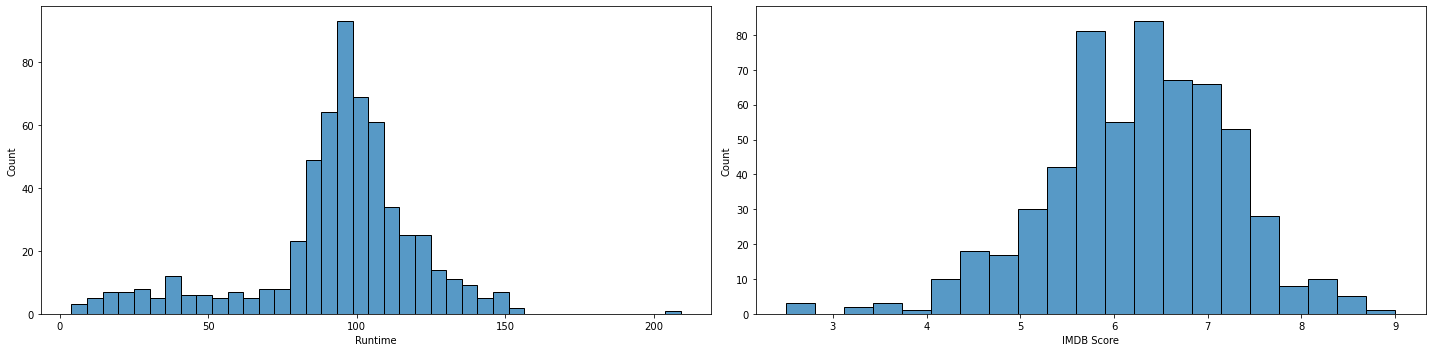

In [895]:
data_dist = netflix.describe().columns
plt.figure(figsize=(20,5))

for col in range(len(data_dist)):
    plt.subplot(1,2, col+1)
    sns.histplot(data=netflix, x=data_dist[col]);

plt.tight_layout()

#### (2.2) Pemeriksaan dengan Boxplot

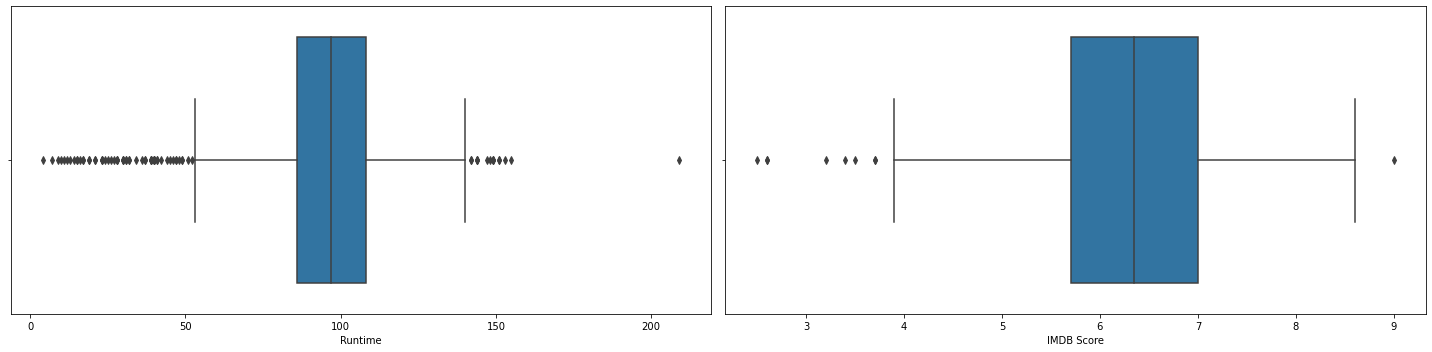

In [896]:
plt.figure(figsize=(20,5))

for col in range(len(data_dist)):
    plt.subplot(1,2, col+1)
    sns.boxplot(data=netflix, x=data_dist[col]);
plt.tight_layout()

#### (2.3) Pemeriksaan dengan QQ Plot

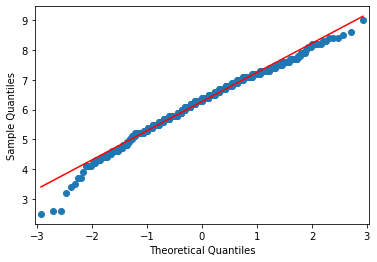

In [897]:
sm.qqplot(data=netflix['IMDB Score'], line='s');

#### (2.4) Pemeriksaan dengan Kolmogorov-Smirnov Test

In [898]:
stat, pvalue = kstest(netflix['IMDB Score'], 'norm')

if pvalue > 0.05:
    # Ho
    print(f'pvalue={pvalue}. pvalue > 0.05. Gagal menolak Ho. Kita mengasumsikan data terdistribusi normal')
else:
    # Ha
    print(f'pvalue={pvalue}. pvalue <= 0.05. Berhasil menolak Ho. Kita mengasumsikan data TIDAK terdistribusi normal')

pvalue=0.0. pvalue <= 0.05. Berhasil menolak Ho. Kita mengasumsikan data TIDAK terdistribusi normal


#### (2.5) Pemeriksaan Skewed

In [899]:
netflix['Runtime'].skew()
# left skewed --> skew < 0

-0.8854301862093341

#### (2.5) KESIMPULAN 
---
Hasil dari uji distribusi data dengan 2 kolom (IMDB Score dan Runtime), yaitu:

1. Melakukan pengujian dengan Histogram ditemukan data TIDAK berdistribusi normal
2. Melakukan pengujian dengan Boxplot ditemukan data TIDAK berdistribusi normal
3. Melakukan pengujian dengan QQ Plot ditemukan data TIDAK berdistribusi normal
4. Melakukan pengujian dengan Kolmogorov-Smirnov Test ditemukan data TIDAK berdistribusi normal
5. Data TIDAK berdistribusi normal (Left-Skewed)
6. Ditemukan beberapa outlier
---

### (3) Informasi Film Keseluruhan
    Tahapan ketiga, saya mulai melakukan pembacaan data dengan memahami beberapa informasi sederhana dari tiap kolom yang tersedia. Informasi sederhana seperti, Jenis bahasa yang digunakan, Genre yang digunakan, Durasi dari sebuah film, dan Rating dari film sangat membantu sebagai bagian dari langkah-langkah eksplorasi berikutnya. 

#### (3.1) BAHASA
-- Mencari Bahasa yang terdapat pada Netflix Originals --

In [900]:
Language_column = ['Language1','Language2','Language3']
df['Total Language'] = df[Language_column].apply(lambda x: ','.join(x.astype(str)), axis=1)
Language_counts = df['Total Language'].str.split(',', expand=True).stack().value_counts().sort_index()
Language_counts

-             1142
Akan             1
Arabic           1
Basque           1
Bengali          1
Catalan          1
Dutch            3
English        422
Filipino         2
French          21
Georgian         1
German           5
Hindi           35
Indonesian       9
Italian         14
Japanese         8
Khmer            1
Korean           7
Malay            1
Mandarin         3
Marathi          3
Norwegian        1
Polish           3
Portuguese      12
Russian          2
Spanish         39
Swedish          2
Taiwanese        1
Tamil            1
Thai             3
Turkish          5
Ukranian         1
dtype: int64

Informasi yang didapatkan dari Bahasa yang digunakan pada film Netflix Originals, antara lain:

1. Netflix Originals menyediakan film yang menggunakan 31 Bahasa.
2. Bahasa Akan, Arabic, Basque, Bengali, Catalan, Dutch, English, Filipino, French, Georgian, German, Hindi, Indonesian, Italian, Japanese, Khmer, Korean, Malay, Mandarin, Marathi, Norwegian, Polish, Portuguese, Russian, Spanish, Swedish, Taiwanese, Tamil, Thai, Turkish, dan Ukranian.
3. 3 Bahasa yang paling sering digunakan adalah English, Spanish, dan Hindi
---

#### (3.2) GENRE
-- Mencari Genre yang terdapat pada film Netflix Originals -- 

In [901]:
Genre_column = ['Genre1','Genre2','Genre3','Genre4']
df['Total Genre'] = df[Genre_column].apply(lambda x: ','.join(x.astype(str)), axis=1)
Genre_counts = df['Total Genre'].str.split(',', expand=True).stack().value_counts().sort_index()
Genre_counts

-              1505
Action           35
Adventure        14
Animation        22
Biography        12
Comedy          161
Crime            20
Documentary     169
Drama           148
Family           14
Fantasy          12
Horror           23
Musical          23
Mystery           4
Reality-TV        1
Romance          62
Sci-Fi           22
Short            14
Sports            4
Thriller         64
War               7
dtype: int64

Informasi yang didapatkan dari Genre film yang terdapat di film Netflix Originals, antara lain:

1. Netflix Originals menyediakan 20 Genre film
2. Genre Action, Adventure, Animation, Biography, Comedy, Crime, Documentary, Drama, Family, Fantasy, Horror, Musical, Mystery, Reality-TV, Romance, Sci-Fi, Short, Sports, Thriller, dan War.
3. 5 Genre terbanyak, yaitu Documentary, Comedy, Drama, Thriller, dan Romance
4. 3 Genre yang paling jarang, yaitu Reality-TV, Mystery, dan Sports
---

#### (3.3) DURASI FILM
-- Mencari informasi terkait durasi pada film Netflix Originals --

In [902]:
netflix['Category By Runtime'].value_counts()

Feature Film    445
Short Film       71
Epic Film        68
Name: Category By Runtime, dtype: int64

In [903]:
netflix['Runtime'].describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

Informasi yang didapatkan dari durasi film Netflix Originals, yaitu:

1. Terdapat 3 pengelompokkan film yaitu, Feature film, Short Film, dan Epic Film
2. Film terbanyak berdasarkan durasi yaitu Feature Film (Rentang 60 - 120 Menit)
3. Film tersingkat berdurasi 4 menit.
4. Film terpanjang berdurasi 209 menit.
5. Rata-rata durasi film yang ada adalah 93 menit.
---

#### (3.4) RATING FILM
-- Mencari informasi terkait rating pada film Netflix Originals --

In [904]:
netflix['Category By Rating'].value_counts()

Not Bad         225
Acceptable      153
Good            135
Almost There     45
Very Good        16
Bad               6
Awful             3
Excellent         1
Name: Category By Rating, dtype: int64

In [905]:
netflix['IMDB Score'].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

Informasi yang didapatkan dari Rating film Netflix Originals, antara lain:

1. Terdapat 10 pengelompokkan film, namun hanya terdapat 8 rating yang terisi, yaitu Awful, Bad, Almost There, Acceptable, Not Bad, Good, Very Good, Excellent.
2. 2 kelompok film yang tidak terdapat di film Netflix Originals, yaitu Do Not Want, dan Masterpiece. Artinya tidak ada film yang terlalu buruk hingga orang tidak berminat untuk menonton, dan tidak ada film yang sangat amat sempurna.
3. Paling banyak orang menilai film Netflix Originals adalah Not Bad, Acceptable, dan Good.
4. Rating terendah yang diberikan adalah 2.5.
5. Rating tertinggi yang diberikan adalah 9.0.
6. Rata-rata rating film Netflix Originals adalah 6.2.
---

### (4) PENGELOMPOKKAN 10 FILM
    Tahapan keempat, saya mulai mencoba mencari beberapa saran mendasar untuk informasi kepada pihak Netflix. Pengelompokkan yang akan saya lakukan ini, melibatkan 10 film sample mulai dari 10 film terbaik, terburuk, terpanjang, maupun terpendek. Tujuan dari dilakukannya pencarian ini, adalah mengharapkan pihak perusahaan dapat mengevaluasi film-film yang sekiranya perlu dilakukan evaluasi ulang. 

#### (4.1) 10 Film Terbaik
-- Menampilkan 10 film terbaik berdasarkan rating IMDB --

In [906]:
Top10_rating = netflix.sort_values(by='IMDB Score', ascending=False)
Top10_rating.head(10)

,Title,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4,Category By Runtime,Category By Rating
121,David Attenborough: A Life on Our Planet,2020-10-04,83,9.0,English,-,-,Documentary,-,-,-,Feature Film,Excellent
145,Emicida: AmarElo - It's All For Yesterday,2020-12-08,89,8.6,Portuguese,-,-,Documentary,-,-,-,Feature Film,Very Good
412,Springsteen on Broadway,2018-12-16,153,8.5,English,-,-,Documentary,Musical,-,-,Epic Film,Very Good
67,Ben Platt: Live from Radio City Music Hall,2020-05-20,85,8.4,English,-,-,Musical,-,-,-,Feature Film,Very Good
577,Winter on Fire: Ukraine's Fight for Freedom,2015-10-09,91,8.4,English,Ukranian,Russian,Documentary,-,-,-,Feature Film,Very Good
427,Taylor Swift: Reputation Stadium Tour,2018-12-31,125,8.4,English,-,-,Musical,-,-,-,Epic Film,Very Good
114,Cuba and the Cameraman,2017-11-24,114,8.3,English,-,-,Documentary,-,-,-,Feature Film,Very Good
118,Dancing with the Birds,2019-10-23,51,8.3,English,-,-,Documentary,-,-,-,Short Film,Very Good
1,13th,2016-10-07,100,8.2,English,-,-,Documentary,-,-,-,Feature Film,Very Good
383,Seaspiracy,2021-03-24,89,8.2,English,-,-,Documentary,-,-,-,Feature Film,Very Good


Hasil 10 Top Film berdasarkan IMDB Score dapat berfungsi untuk pihak Netflix untuk merekomendasikan film kepada penonton

#### (4.2) 10 Film Terburuk
-- Menampilkan 10 film terburuk berdasarkan rating IMDB -- 

In [907]:
Top10_rating.tail(10)

,Title,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4,Category By Runtime,Category By Rating
445,The Call,2020-11-27,112,4.1,Korean,-,-,Drama,-,-,-,Feature Film,Almost There
330,Paradox,2018-03-23,73,3.9,English,-,-,Fantasy,Musical,-,-,Feature Film,Bad
255,Leyla Everlasting,2020-12-04,112,3.7,Turkish,-,-,Comedy,-,-,-,Feature Film,Bad
481,The Last Days of American Crime,2020-06-05,149,3.7,English,-,-,Crime,Drama,Thriller,-,Epic Film,Bad
136,Drive,2019-11-01,147,3.5,Hindi,-,-,Action,-,-,-,Epic Film,Bad
244,Kaali Khuhi,2020-10-30,90,3.4,Hindi,-,-,Drama,Mystery,Thriller,-,Feature Film,Bad
502,The Open House,2018-01-19,94,3.2,English,-,-,Horror,Thriller,-,-,Feature Film,Bad
435,The App,2019-12-26,79,2.6,Italian,-,-,Drama,Sci-Fi,-,-,Feature Film,Awful
120,Dark Forces,2020-08-21,81,2.6,Spanish,-,-,Thriller,-,-,-,Feature Film,Awful
147,Enter the Anime,2019-08-05,58,2.5,English,Japanese,-,Documentary,-,-,-,Short Film,Awful


Hasil film dengan rating terburuk, dapat berguna untuk pihak Netflix. Pihak Netflix, dapat memperhatikan ulang film tersebut dan mengambil keputusan untuk mempromosikan atau menghapus film tersebut

#### (4.3) 10 Film Terpanjang
-- Menampilkan 10 Film dengan durasi paling lama -- 

In [908]:
Top10_duration = netflix.sort_values(by='Runtime', ascending=False)
Top10_duration.head(10)

,Title,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4,Category By Runtime,Category By Rating
471,The Irishman,2019-11-27,209,7.8,English,-,-,Crime,Drama,-,-,Epic Film,Good
115,Da 5 Bloods,2020-06-12,155,6.5,English,-,-,Drama,War,-,-,Epic Film,Not Bad
412,Springsteen on Broadway,2018-12-16,153,8.5,English,-,-,Documentary,Musical,-,-,Epic Film,Very Good
99,Citation,2020-11-06,151,6.2,English,-,-,Drama,-,-,-,Epic Film,Not Bad
462,The Forest of Love,2019-10-11,151,6.3,Japanese,-,-,Drama,-,-,-,Epic Film,Not Bad
481,The Last Days of American Crime,2020-06-05,149,3.7,English,-,-,Crime,Drama,Thriller,-,Epic Film,Bad
273,Ludo,2020-11-12,149,7.6,Hindi,-,-,Action,Comedy,Crime,Drama,Epic Film,Good
345,Raat Akeli Hai,2020-07-31,149,7.3,Hindi,-,-,Thriller,-,-,-,Epic Film,Good
53,Army of the Dead,2021-05-21,148,5.9,English,-,-,Action,Crime,Drama,Horror,Epic Film,Acceptable
136,Drive,2019-11-01,147,3.5,Hindi,-,-,Action,-,-,-,Epic Film,Bad


Hasil film dengan durasi panjang, dapat digunakan oleh netflix untuk merekomendasikan film berdurasi lebih dari 2jam kepada penonton yang menyukai film berdurasi lama.

#### (4.4) 10 Film Terpendek
-- Menampilkan 10 Film dengan durasi paling singkat -- 

In [909]:
Top10_duration.tail(10)

,Title,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,Genre1,Genre2,Genre3,Genre4,Category By Runtime,Category By Rating
48,Anima,2019-06-27,15,7.7,English,-,-,Musical,Short,-,-,Short Film,Good
400,Sitara: Let Girls Dream,2020-03-08,15,7.3,English,-,-,Animation,Short,-,-,Short Film,Good
217,I'm No Longer Here: A Discussion with Guillermo del Toro and Alfonso Cuaron,2020-11-03,14,7.0,English,-,-,Documentary,Short,-,-,Short Film,Good
518,The Road to El Camino: A Breaking Bad Movie,2019-10-29,13,7.2,English,-,-,Documentary,-,-,-,Short Film,Good
222,If Anything Happens I Love You,2020-11-20,12,7.8,English,-,-,Animation,Short,-,-,Short Film,Good
583,Zion,2018-08-10,11,7.2,English,-,-,Documentary,-,-,-,Short Film,Good
42,American Factory: A Conversation with the Obamas,2019-08-21,10,5.2,English,-,-,Documentary,Short,-,-,Short Film,Acceptable
88,Canvas,2020-12-11,9,6.5,English,-,-,Animation,Short,-,-,Short Film,Not Bad
108,Cops and Robbers,2020-12-28,7,6.9,English,-,-,Animation,Short,-,-,Short Film,Not Bad
403,Sol Levante,2020-04-02,4,4.7,English,-,-,Animation,Action,Fantasy,Short,Short Film,Almost There


### (5) Mencari Informasi Lebih Mendalam
    Tahapan kelima, saya melakukan eksplorasi lebih mendalam lagi terhadap beberapa faktor film. Beberapa informasi akan mulai terjawab pada tahapan ini. Pada dasarnya, data Netflix Originals ini kurang memadai untuk dilakukan analisis yang sangat akurat, dikarenakan setelah mempelajari informasi yang diberikan ditemukan beberapa kekurangan informasi data film. Contohnya, film yang berscore jelek belum tentu film tersebut gagal produksi, kemungkinan juga film yang berscore bagus belum tentu sebenarnya film tersebut bagus. Maka dari itu, dilakukan eksplorasi ini untuk mencari pola-pola yang lebih umum untuk dianalisa untuk membantu mencari jawaban dari tujuan kita.

#### (5.1) Analisa Bahasa

-- Mencari pola pola yang terdapat pada bahasa yang digunakan pada film Netflix Originals -- 

In [910]:
# Mengambil kolom Language1, Language2, dan Language3
stacked_netflix_Language = netflix[['Title','Premiere','Runtime','IMDB Score','Language1','Language2','Language3']]
stacked_netflix_Language.head()

,Title,Premiere,Runtime,IMDB Score,Language1,Language2,Language3
0,#REALITYHIGH,2017-09-08,99,5.2,English,-,-
1,13th,2016-10-07,100,8.2,English,-,-
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,2017-01-26,36,7.1,English,-,-
3,15-Aug,2019-03-29,124,5.8,Marathi,-,-
4,1922,2017-10-20,102,6.3,English,-,-


In [911]:
# Menumpuk nilai kolom Language1, Language2, dan Language3 menjadi Language_Name
stacked_language = stacked_netflix_Language.set_index(['Title','Premiere','Runtime','IMDB Score']).stack().reset_index()
stacked_language.columns = ['Title','Premiere','Runtime','IMDB Score','Language','Language_Name']
stacked_language = stacked_language[stacked_language['Language_Name'] != '-']
stacked_language.head()

,Title,Premiere,Runtime,IMDB Score,Language,Language_Name
0,#REALITYHIGH,2017-09-08,99,5.2,Language1,English
3,13th,2016-10-07,100,8.2,Language1,English
6,13th: A Conversation with Oprah Winfrey & Ava DuVernay,2017-01-26,36,7.1,Language1,English
9,15-Aug,2019-03-29,124,5.8,Language1,Marathi
12,1922,2017-10-20,102,6.3,Language1,English


In [912]:
# stacked_language.to_csv('Bahasa.csv')

In [913]:
# Mengurutkan jumlah bahasa
total_Language = stacked_language['Language_Name'].value_counts()
sorted_Language = total_Language.sort_values(ascending=False)

In [914]:
kelompok_language = stacked_language.groupby(['Language','Language_Name'])[['Title']].count()
kelompok_language.sort_values(by='Title', ascending=False)

Title
Language  Language_Name       
Language1 English          419
          Spanish           34
          Hindi             33
          French            20
          Italian           14
          Portuguese        12
          Indonesian         9
          Japanese           6
          Korean             6
          German             5
Language2 Spanish            5
Language1 Turkish            5
Language2 English            3
Language1 Thai               3
          Dutch              3
          Polish             3
          Marathi            3
Language2 Mandarin           2
          Hindi              2
          Japanese           2
Language1 Filipino           2
Language2 Swedish            1
          Taiwanese          1
          Ukranian           1
Language3 French             1
Language2 Russian            1
Language3 Mandarin           1
Language2 Korean             1
Language1 Bengali            1
          Tamil              1
Language2 Catalan            1
          Basque             1
          Arabic             1
          Akan               1
Language1 Swedish            1
          Norwegian          1
          Malay              1
          Khmer              1
          Georgian           1
Language3 Russian            1

##### (5.1.1) Pengelompokkan Bahasa

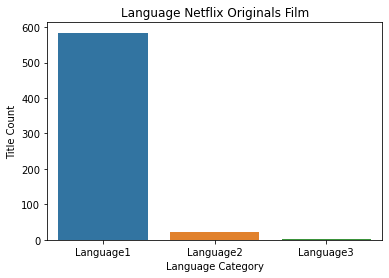

In [915]:
# Menampilkan Visualisasi jumlah film berdasarkan kelompok bahasanya
sns.countplot(data=stacked_language, x='Language')
plt.xlabel('Language Category')
plt.ylabel('Title Count')
plt.title('Language Netflix Originals Film');

Hasil analisa pengelompokkan bahasa
1. Bahasa1 merupakan bahasa dari asal film tersebut. Sementara Bahasa2 dan Bahasa3 merupakan Bahasa pendukung/Subtitle yang mendukung jika target penonton berasal dari negara yang memiliki bahasa berbeda.
2. Penggunaan Bahasa2 dan Bahasa3 belum terlalu dimanfaatkan, dengan perbedaan jumlah film yang menggunakan bahasa pendukung dengan bahasa asli film tersebut.
---

##### (5.1.2) Jumlah Penggunaan Bahasa 

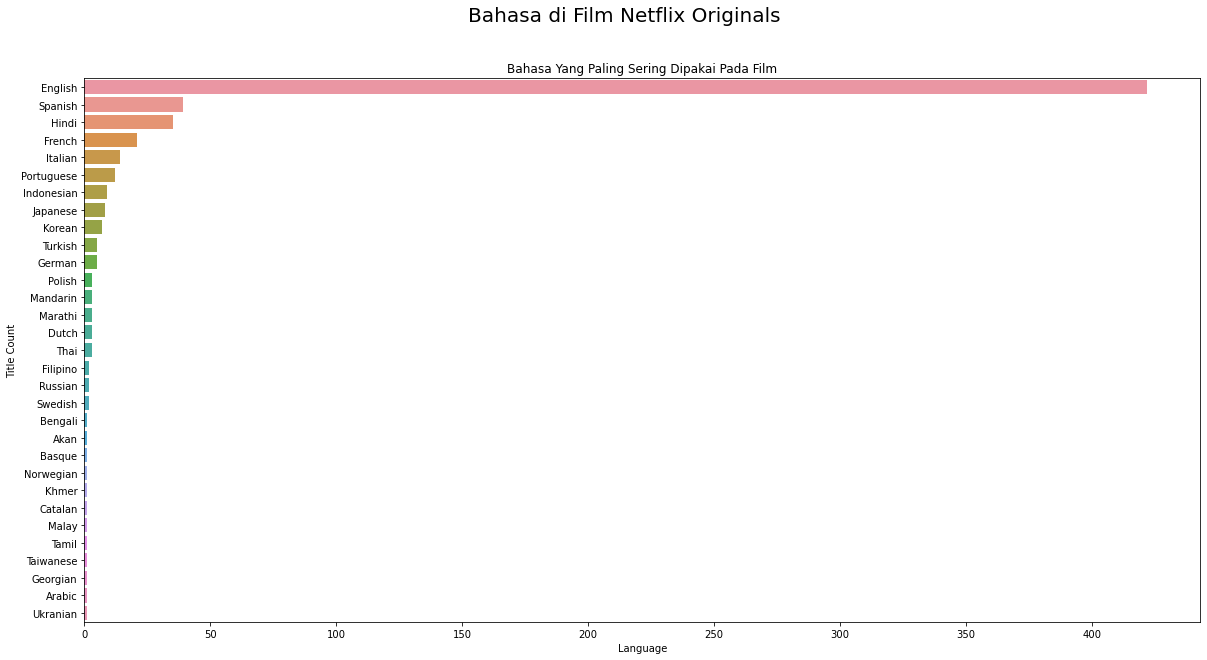

In [916]:
# Membuat Visualisasi Jumlah Penggunaan Bahasa
plt.figure(figsize=(20, 10))
sns.countplot(data=stacked_language, y='Language_Name', order=sorted_Language.index)
plt.xlabel('Language')
plt.ylabel('Title Count')
plt.title('Bahasa Yang Paling Sering Dipakai Pada Film')
plt.suptitle('Bahasa di Film Netflix Originals', size=20)
plt.show()

Hasil analisa jumlah bahasa
1. Grafik diatas, merupakan gabungan jumlah bahasa yang digunakan dari Bahasa1, Bahasa2, dan Bahasa3.
2. 10 Bahasa terbanyak penggunaannya, adalah inggris, spanish, hindi, french, italian, portuguese, indonesian, japanese, korean, dan turkish
---

##### (5.1.3) Runtime & Rating Berdasarkan Bahasa

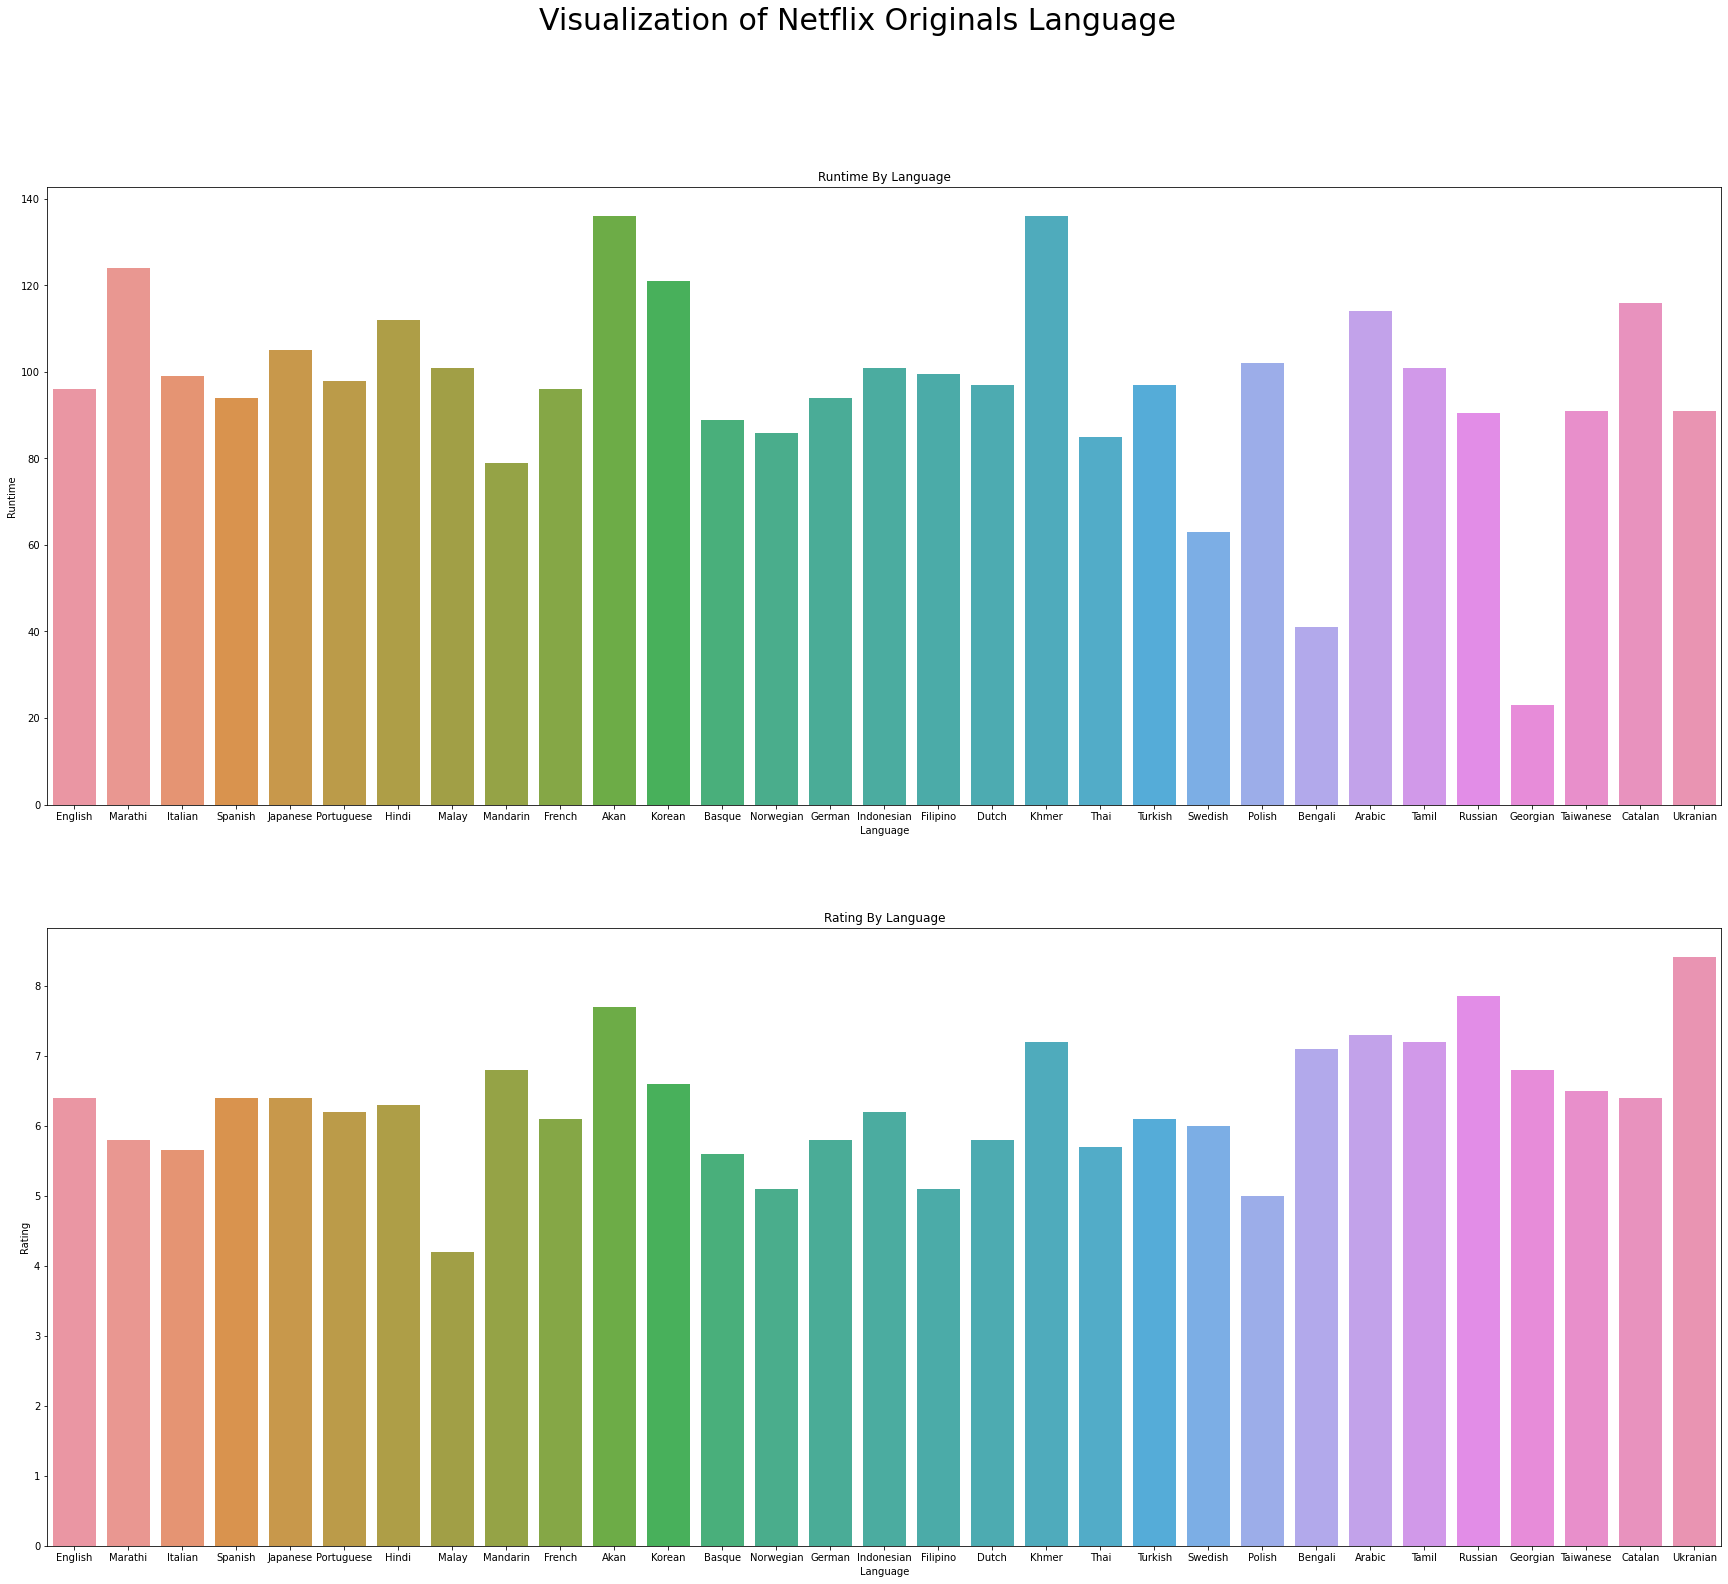

In [917]:
plt.figure(figsize=(30,25))

# Runtime berdasarkan bahasanya
ax1 = plt.subplot(2,1,1)
sns.barplot(data=stacked_language, x='Language_Name', y='Runtime', estimator=np.median, ci=0)
plt.xlabel('Language')
plt.ylabel('Runtime')
plt.title('Runtime By Language')

# Rating berdasarkan bahasanya
ax2 = plt.subplot(2,1,2)
sns.barplot(data=stacked_language, x='Language_Name', y='IMDB Score', estimator=np.median, ci=0)
plt.xlabel('Language')
plt.ylabel('Rating')
plt.title('Rating By Language')

plt.suptitle('Visualization of Netflix Originals Language', size=30)

plt.show()

Hasil analisa runtime & rating berdasarkan bahasanya, yaitu:
1. Film yang berbahasa malay, norwegian, filipino, dan polish memiliki rating yang cenderung lebih kecil di antara bahasa yang lain.
2. Film yang berbahasa akan, khmer, arabic, russian, dan ukranian memiliki rating yang cenderung lebih tinggi di antara bahasa yang lain.
3. Film yang berbahasa marathi, akan, dan khmer memiliki durasi Epic Film (+120 Menit)
4. Film yang berbahasa georgian dan bengali memiliki kecenderungan berjenis Short Film (-60 Menit).

#### (5.2) Analisa Genre

In [918]:
# Mengambil kolom title, runtime, imdb score, genre1, genre2, genre3, dan genre4
stacked_netflix_Genre = netflix[['Title','Runtime','IMDB Score','Genre1','Genre2','Genre3','Genre4']]
stacked_netflix_Genre.head()

,Title,Runtime,IMDB Score,Genre1,Genre2,Genre3,Genre4
0,#REALITYHIGH,99,5.2,Comedy,-,-,-
1,13th,100,8.2,Documentary,-,-,-
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,36,7.1,Documentary,Short,-,-
3,15-Aug,124,5.8,Comedy,Drama,-,-
4,1922,102,6.3,Crime,Drama,Horror,-


In [919]:
# Menumpuk nilai kolom Genre1, Genre2, Genre3, dan Genre4 menjadi Genre_Name
stacked_Genre = stacked_netflix_Genre.set_index(['Title','Runtime','IMDB Score']).stack().reset_index()
stacked_Genre.columns = ['Title','Runtime','IMDB Score','Genre','Genre_Name']
stacked_Genre = stacked_Genre[stacked_Genre['Genre_Name'] != '-']
stacked_Genre.head()

,Title,Runtime,IMDB Score,Genre,Genre_Name
0,#REALITYHIGH,99,5.2,Genre1,Comedy
4,13th,100,8.2,Genre1,Documentary
8,13th: A Conversation with Oprah Winfrey & Ava DuVernay,36,7.1,Genre1,Documentary
9,13th: A Conversation with Oprah Winfrey & Ava DuVernay,36,7.1,Genre2,Short
12,15-Aug,124,5.8,Genre1,Comedy


##### (5.2.1) Pengelompokkan Genre

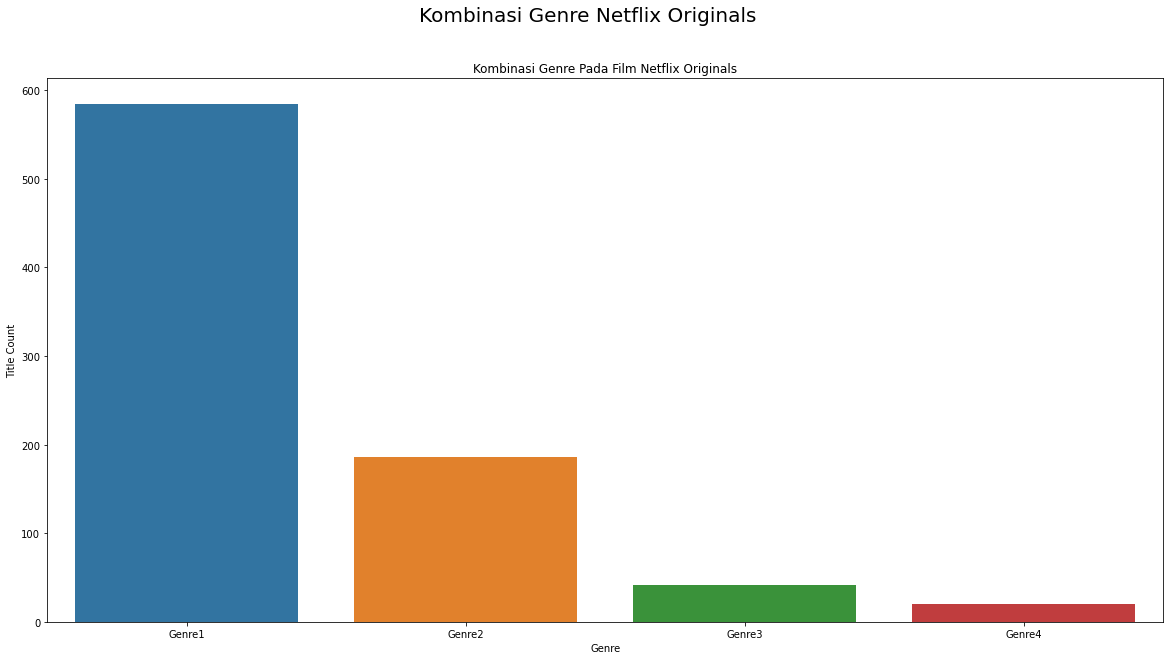

In [920]:
# Membuat Visualisasi Jumlah Penggunaan Genre
plt.figure(figsize=(20, 10))
sns.countplot(data=stacked_Genre, x='Genre')
plt.xlabel('Genre')
plt.ylabel('Title Count')
plt.title('Kombinasi Genre Pada Film Netflix Originals')
plt.suptitle('Kombinasi Genre Netflix Originals', size=20)
plt.show()

Hasil analisa pengelompokkan genre, yaitu:
1. Ke-4 Genre tersebut merupakan jumlah kombinasi genre yang digunakan pada film
2. Genre1 banyak digunakan oleh film pada Netflix Originals
3. Genre2, Genre3, dan Genre4 sangat berbeda jauh dengan jumlah penggunaan Genre1
---

In [921]:
# stacked_Genre.to_csv('Genre.csv')

In [922]:
total_Genre = stacked_Genre['Genre_Name'].value_counts()
total_Genre.index

Index(['Documentary', 'Comedy', 'Drama', 'Thriller', 'Romance', 'Action',
       'Horror', 'Musical', 'Animation', 'Sci-Fi', 'Crime', 'Family', 'Short',
       'Adventure', 'Fantasy', 'Biography', 'War', 'Sports', 'Mystery',
       'Reality-TV'],
      dtype='object')

##### (5.2.2) Perbandingan Genre dengan Rating Film

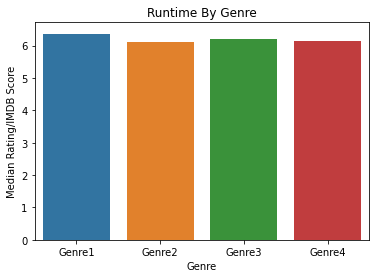

In [923]:
sns.barplot(data=stacked_Genre, x='Genre', y='IMDB Score', estimator=np.median, ci=0)
plt.xlabel('Genre')
plt.ylabel('Median Rating/IMDB Score')
plt.title('Runtime By Genre')
plt.show();

Hasil dari membandingkan Genre dengan IMDB Score, ternyata ditemukan:
1. Sangat penting memiliki kombinasi Genre yang banyak. Alasannya, bisa dilihat pada grafik bahwa Genre1-Genre4 menyumbang nilai yang rata-ratanya kurang lebih sama.
2. Namun jika dilihat dari grafik kombinasi genre, jumlah Genre2, Genre3, dan Genre4 sangatlah kurang.
---

##### (5.2.3) Jumlah Penggunaan Genre

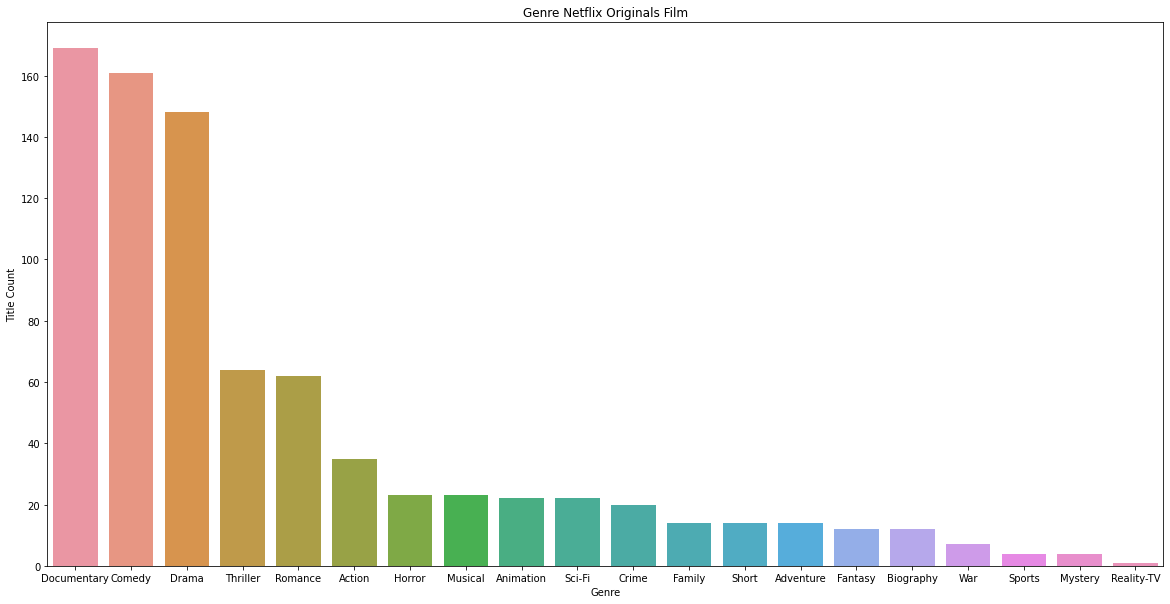

In [924]:
# Jumlah Film berdasarkan genre
plt.figure(figsize=(20,10))

sns.countplot(data=stacked_Genre, x='Genre_Name', order=total_Genre.index)
plt.xlabel('Genre')
plt.ylabel('Title Count')
plt.title('Genre Netflix Originals Film');

Hasil yang ditemukan dari jumlah penggunaan genre, yaitu:
1. Genre Documentary, Comedy, Drama, Thriller, dan Romance merupakan 5 genre terbanyak.
2. Reality-TV, Mystery, Sports, War, dan Biography termasuk Genre yang paling sedikit.
3. Genre lain seperti Action, Horror, Musical, Animation, Sci-Fi, Crime, Family, Short, Adventure, dan Fantasy memiliki jumlah penggunaan yang jumlahnya hampir sama.
---

##### (5.2.4) Runtime & Rating Berdasarkan Genre

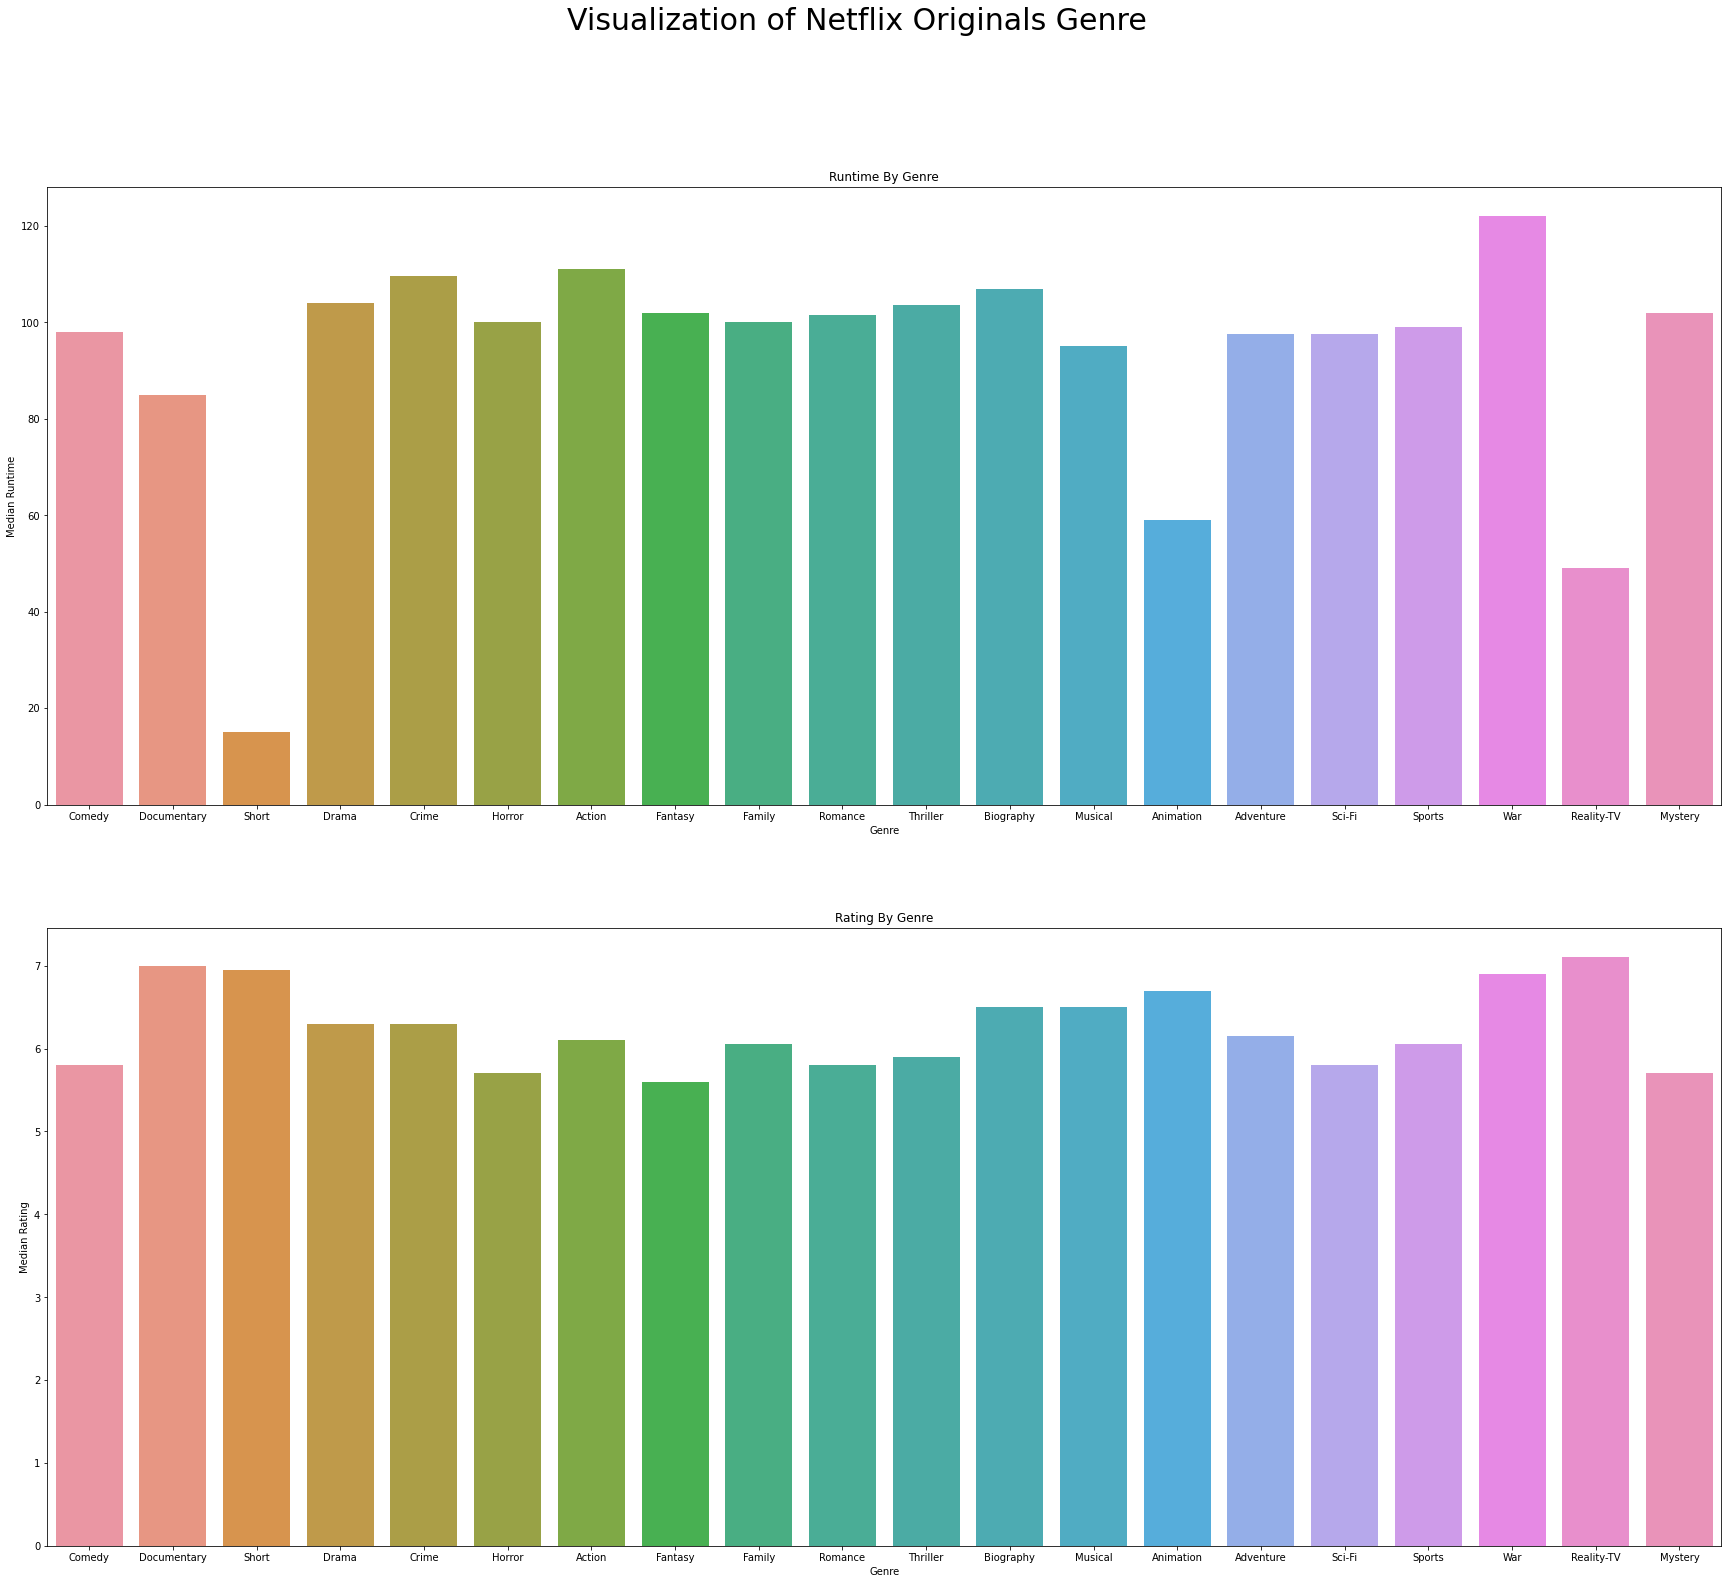

In [925]:
plt.figure(figsize=(30,25))

# Runtime berdasarkan bahasanya
ax1 = plt.subplot(2,1,1)
sns.barplot(data=stacked_Genre, x='Genre_Name', y='Runtime', estimator=np.median, ci=0)
plt.xlabel('Genre')
plt.ylabel('Median Runtime')
plt.title('Runtime By Genre')

# Rating berdasarkan bahasanya
ax2 = plt.subplot(2,1,2)
sns.barplot(data=stacked_Genre, x='Genre_Name', y='IMDB Score', estimator=np.median, ci=0)
plt.xlabel('Genre')
plt.ylabel('Median Rating')
plt.title('Rating By Genre')

plt.suptitle('Visualization of Netflix Originals Genre', size=30)

plt.show()

Hasil dari membaca grafik Rating & Runtime berdasarkan Genre, ditemukan:
1. Film dengan durasi Short Film (-60 Menit), memiliki kecenderungan rating yang bagus. Bisa dilihat, seperti genre short, animation, reality-TV. walaupun durasi singkat ke tiga film tersebut memiliki sumbangan rating yang tinggi.
2. Setelah dilakukan pencocokan ke-3 genre tersebut ke jumlah film, ternyata jumlah film dengan kategori tersebut masih sangat sedikit dibandingkan dengan kategory lainnya.
3. Genre Comedy, Horror, Fantasy, Sci-Fi, dan Mystery termasuk genre yang memiliki rating rendah diantara yang lain
---

### (6) Uji Korelasi Antara Category Runtime dengan IMDB Score
    Tahap keenam, saya melakukan pengujian untuk melihat hubungan korelasi antara Runtime dengan Ratingnnya. Saya hanya melakukan pengujuan terhadap salah satunya, karena hasilnya akan sama antara Runtime ataupun IMDB Scorenya.

In [927]:
netflix.groupby(['Category By Rating','Category By Runtime'])[['IMDB Score']].mean().sort_values(by='IMDB Score')

IMDB Score
Category By Rating Category By Runtime            
Awful              Short Film             2.500000
                   Feature Film           2.600000
Bad                Feature Film           3.550000
                   Epic Film              3.600000
Almost There       Epic Film              4.200000
                   Short Film             4.460000
                   Feature Film           4.576316
Acceptable         Feature Film           5.532576
                   Short Film             5.620000
                   Epic Film              5.636364
Not Bad            Feature Film           6.433526
                   Epic Film              6.503846
                   Short Film             6.603846
Good               Short Film             7.225000
                   Feature Film           7.298780
                   Epic Film              7.388000
Very Good          Feature Film           8.230769
                   Short Film             8.300000
                   Epic Film              8.450000
Excellent          Feature Film           9.000000

#### (6.1) Uji Korelasi Antara Runtime dan IMDB Score

In [928]:
# Melihat korelasi antara Rating dengan IMDB Score, Begitu juga sebaliknya
netflix.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


<AxesSubplot:xlabel='Runtime', ylabel='IMDB Score'>

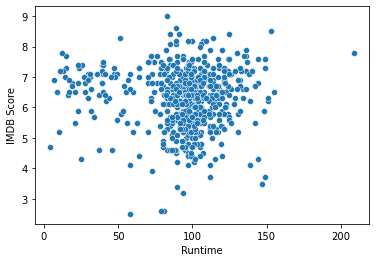

In [929]:
# Melihat persebaran data antara runtime dengan IMDB Scorenya.
sns.scatterplot(data=netflix, x='Runtime', y= 'IMDB Score')

Hasil uji korelasi Runtime dengan IMDB Score, ditemukan:

Setelah melakukan pengujian, ternyata ditemukan Runtime dengan IMDB Score tidak berkorelasi, dan terdapat outlier.

#### (6.2) Uji Korelasi Antara Category Runtime dengan IMDB Score
Dilakukan karena Runtime dengan IMDB Score tidak berkorelasi, maka kita coba dengan category pengelompokkannya

In [930]:
netflix.groupby(['Category By Runtime'])[['IMDB Score']].mean()

,IMDB Score
Category By Runtime,
Epic Film,6.592647
Feature Film,6.182247
Short Film,6.525352


##### (6.2.1) Menggunakan Kruskal

- H0 (Hipotesis Nol): Tidak ada perbedaan rata-rata signifikan antara kelompok film berdasarkan durasi dalam hal rating.
- H1 (Hipotesis Alternatif): Terdapat perbedaan rata-rata signifikan antara antara kelompok film berdasarkan durasi dalam hal rating.

In [931]:
stat, pvalue = kruskal(
    netflix[netflix['Category By Runtime']=='Epic Film']['IMDB Score'],
    netflix[netflix['Category By Runtime']=='Feature Film']['IMDB Score'],
    netflix[netflix['Category By Runtime']=='Short Film']['IMDB Score']
)

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho.
    kita tidak memiliki cukup bukti untuk menolak Ho.
    Tidak ada perbedaan signifikan antara rata-rata IMDB Score pada kelompok film berdasarkan durasinya.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho.
    memiliki cukup bukti untuk menolak H0 dan menerima H1
    Terdapat perbedaan signifikan antara rata-rata IMDB Score pada kelompok film berdasarkan durasinya.
    ''')


    pvalue = 4.209261913092723e-06. pvalue <= 0.05. Reject Ho.
    memiliki cukup bukti untuk menolak H0 dan menerima H1
    Terdapat perbedaan signifikan antara rata-rata IMDB Score pada kelompok film berdasarkan durasinya.
    


##### (6.2.2) Menggunakan Visualisasi Regplot

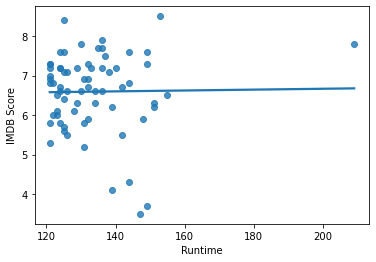

In [932]:
sns.regplot(data=netflix[netflix['Category By Runtime']=='Epic Film'], x='Runtime', y='IMDB Score', ci=0);

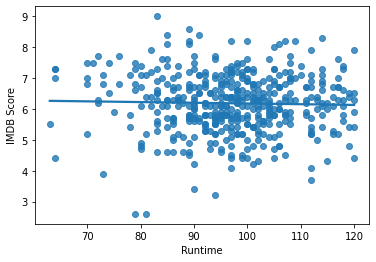

In [933]:
sns.regplot(data=netflix[netflix['Category By Runtime']=='Feature Film'], x='Runtime', y='IMDB Score', ci=0);

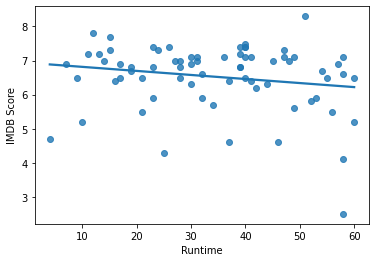

In [934]:
sns.regplot(data=netflix[netflix['Category By Runtime']=='Short Film'], x='Runtime', y='IMDB Score', ci=0);

Hasil ujinya, mengatakan bahwa terdapat perbedaan signifikan yang artinya category runtime berkorelasi dengan IMDB Score.
1. Pada Short Film, dapat dilihat terdapat pengaruh antara durasi dengan scorenya.
2. Di kategory feature film, dan epic film tidak terdapat pengaruh signifikan 
---

### (7) Analisa Berdasarkan Premiere
    Pada tahap analisa ini, bertujuan untuk mengetahui perkembangan film dari tahun ke tahun berserta kebiasaan dan polanya. Namun analisa disini mungkin sedikit susah terbaca, maka saya akan melanjutkan analisa tahunan ini pada tableau.

#### (7.1) Language by Premiere
-- Melihat Perkembangann Bahasa yang digunakan --

In [935]:
netflix['Premiere'] = pd.PeriodIndex(netflix['Premiere'], freq='M')
stacked_language['Premiere'] = pd.PeriodIndex(stacked_language['Premiere'], freq='M')

In [936]:
premiere_Language = stacked_language.groupby(['Premiere'])[['Language_Name']].count().reset_index()
premiere_Language

,Premiere,Language_Name
0,2014-12,1
1,2015-05,2
2,2015-06,1
3,2015-07,1
4,2015-09,1
...,...,...
65,2021-01,16
66,2021-02,13
67,2021-03,12
68,2021-04,18


In [937]:
premiere_Language['Premiere'] = pd.to_datetime(premiere_Language['Premiere'].astype(str))
premiere_Language['Premiere'] = premiere_Language['Premiere'].dt.strftime('%b-%Y')
premiere_Language

,Premiere,Language_Name
0,Dec-2014,1
1,May-2015,2
2,Jun-2015,1
3,Jul-2015,1
4,Sep-2015,1
...,...,...
65,Jan-2021,16
66,Feb-2021,13
67,Mar-2021,12
68,Apr-2021,18


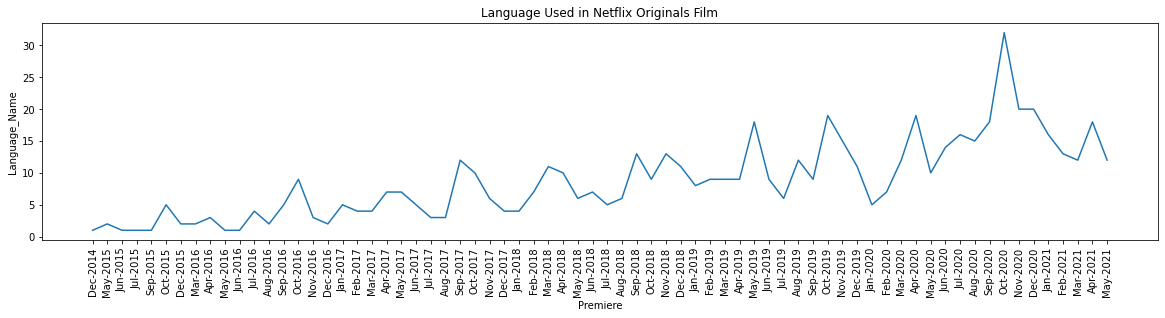

In [938]:
plt.figure(figsize=(20,4))
sns.lineplot(data=premiere_Language, x='Premiere', y='Language_Name')

plt.xticks(rotation=90)
plt.title('Language Used in Netflix Originals Film')

plt.show()

#### (7.2) Rating by Premiere
-- Melihat perkembangan rating dari tahun ke tahun --

In [939]:
premiere_Score = netflix.groupby(['Premiere'])[['IMDB Score']].median().reset_index()
premiere_Score.head()

,Premiere,IMDB Score
0,2014-12,6.4
1,2015-05,6.7
2,2015-06,7.6
3,2015-07,7.4
4,2015-09,7.1


In [940]:
premiere_Score['Premiere'] = pd.to_datetime(premiere_Score['Premiere'].astype(str))
premiere_Score['Premiere'] = premiere_Score['Premiere'].dt.strftime('%b-%Y')
premiere_Score.head()

,Premiere,IMDB Score
0,Dec-2014,6.4
1,May-2015,6.7
2,Jun-2015,7.6
3,Jul-2015,7.4
4,Sep-2015,7.1


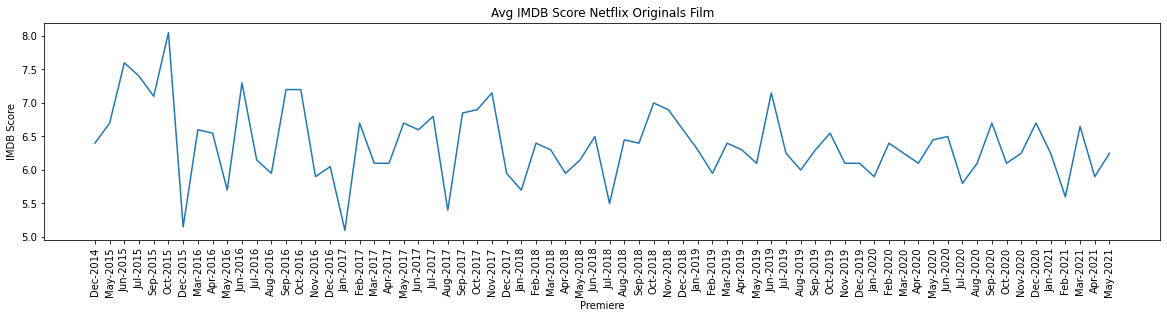

In [941]:
plt.figure(figsize=(20,4))
sns.lineplot(data=premiere_Score, x='Premiere', y='IMDB Score')

plt.xticks(rotation=90)
plt.title('Avg IMDB Score Netflix Originals Film')

plt.show()

#### (7.3) Film Premiere
-- Melihat kebiasaan rilis film dari tahun ke tahun --

In [942]:
premiere_Title = netflix.groupby(['Premiere'])[['Title']].count().reset_index()
premiere_Title

,Premiere,Title
0,2014-12,1
1,2015-05,2
2,2015-06,1
3,2015-07,1
4,2015-09,1
...,...,...
65,2021-01,16
66,2021-02,13
67,2021-03,12
68,2021-04,18


In [943]:
premiere_Title['Premiere'] = pd.to_datetime(premiere_Title['Premiere'].astype(str))
premiere_Title['Premiere'] = premiere_Title['Premiere'].dt.strftime('%b-%Y')
premiere_Title

,Premiere,Title
0,Dec-2014,1
1,May-2015,2
2,Jun-2015,1
3,Jul-2015,1
4,Sep-2015,1
...,...,...
65,Jan-2021,16
66,Feb-2021,13
67,Mar-2021,12
68,Apr-2021,18


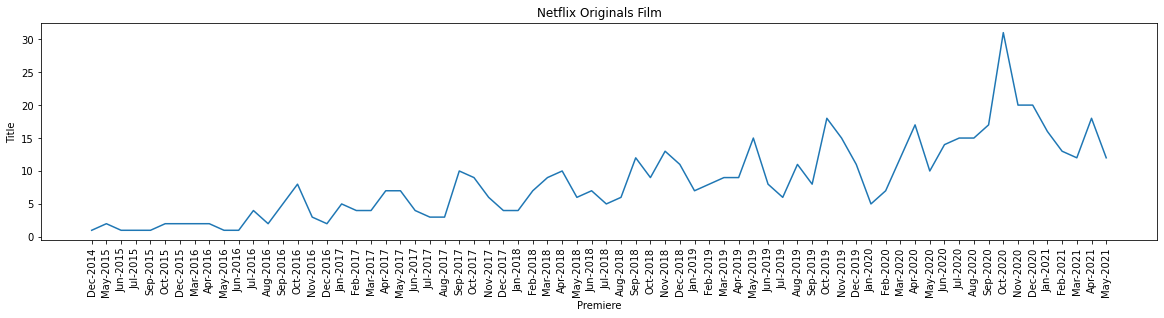

In [944]:
plt.figure(figsize=(20,4))
sns.lineplot(data=premiere_Title, x='Premiere', y='Title')

plt.xticks(rotation=90)
plt.title('Netflix Originals Film')

plt.show()

### (8) Analisa Category By Rating dan Category By Runtime
    Pada tahap analisa ini, kolom ini adalah kolom pengelompokkan yang dibuat sendiri. Dengan mengelompokkan Rating dan Runtime menjadi beberapa kategori mempermudah dalam pembuatan grafik dan pembacaan analisa.

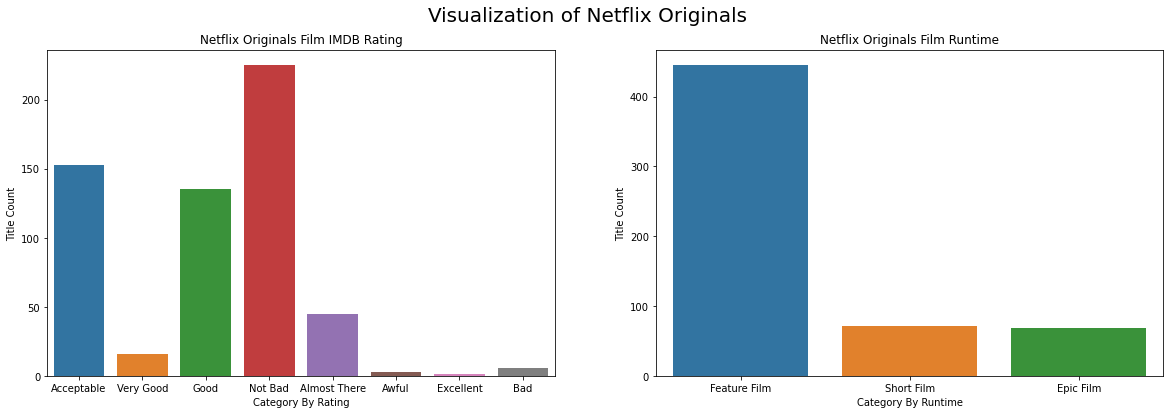

In [945]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.countplot(data=netflix, x='Category By Rating')
plt.xlabel('Category By Rating')
plt.ylabel('Title Count')
plt.title('Netflix Originals Film IMDB Rating')


plt.subplot(1,2,2)
sns.countplot(data=netflix, x='Category By Runtime')
plt.xlabel('Category By Runtime')
plt.ylabel('Title Count')
plt.title('Netflix Originals Film Runtime')

plt.suptitle('Visualization of Netflix Originals', size=20)

plt.show()

Hasil analisa Category Rating & Runtime

1. Film terbanyak termasuk kedalam rating 'Not Bad' dan durasi terbanyak yaitu Future Film (60-120 Menit)
2. Film ke-2 dan ke-3 terbanyak termasuk ke dalam rating 'Acceptable' dan 'Good' 
3. FIlm dengan durasi Short dan Epic Film masih tergolong sedikit
---

## KESIMPULAN KESELURUHAN YANG DIDAPATKAN

1. 	Film Netflix Originals saat ini memiliki kelompok rating terbanyak Not Bad, Acceptable, Good, dan Almost there.
2.	Film Netflix Originals saat ini memiliki durasi film terbanyak yaitu Future Film. Jumlah untuk Epic Film dan Short Film terbilang masih sangat sedikit.
3.	Tanggal perilisan film hampir selalu melonjak di Q4 atau akhir tahun, cenderung meningkat dari tahun ke tahunnya.
4.	Rata-rata ratingnya tidak selalu berbanding lurus dengan tanggal perilisan film (Tidak terdapat hubungan dengan jumlah film dirilis). Rating tidak selalu mulus, terdapat gelombang kenaikan dan penurunan tiap bulannya selama 2014-2021. Namun cenderung ada lonjakan penaikan di Q3 dan Q4 walaupun tidak selalu.
5.	Short Film memiliki kecenderungan rating yang bagus, Namun jumlah film yang tersedia terbilang sangat sedikit.
6.	Comedy, Horror, Fantasy, Sci-Fi dan Mystery memiliki rating yang rendah. Mungkin karena faktor sedikitnya jumlah film dengan genre tersebut.
7.	Sangat penting menggunakan kombinasi 4 Kategori Genre, dapat dibuktikan dengan ke-4 Pengelompokkan Genre memiliki sumbangan rating yang seimbang. Namun dalam prakteknya dalam 2014-2021 penggunaan subtitle/genre dukungan sangat minim, padahal sangat mempengaruhi promosi/penjangkauan penonton.
8.	Bahasa malay, Norwegian, filipino, dan polish memiliki rating cenderung lebih kecil dari bahasa yang lain. 
9.	Film berbahasa marathi, akan dan khmer memiliki durasi epic film (+120 Menit) dengan rating yang cukup baik. contoh bahasa seperti ini diusahakan digantikan dengan bahasa yang lebih dimengerti
10.	Film berbahasa geogian dan Bengali memiliki kecenderungan berjenis Short Film (-60 Menit)
11.	Banyak penggunaan bahasa yang kurang dikenal secara umum, mengingat bahasa utama adalah bahasa tempat dibuatnya film tersebut, maka disarankan untuk memakai bahasa nasional suatu negara. Serta perlu dukungan bahasa ke-2 dan ke-3 yang penerapannya saat ini masih sangat kurang. Bahasa Subtitle/Pendukung sangat diperlukan untuk menjangkau penonton antar negara yang luas
12.	Bahasa daerah yang mengacu pada suatu kelompok pada negara tertentu, harap digantikan dengan bahasa yang dimengerti secara umum/ bahasa ibu dari negara tersebut sebagai identitas film
13.	Memberikan 10 film terbaik, terburuk, terpanjang, dan terpendek. Supaya tim Netflix dapat memberikan rekomendasi kepada penonton, Namun untuk film terburuk diusahakan untuk dilihat ulang. Mungkin saja film tersebut merupakan film bagus, Namun kurang diketahui orang. Keputusan untuk mempromosikan film atau menghapus film sangat diperlukan
---


## MEMBAHAS TUJUAN DAN MASALAH
1. Menurut saya Netflix tidak melakukan kesalahan terhadap film yang diinvestasikan mengingat persebaran rating masih termasuk sangat baik yaitu 5-8, sangat wajar memiliki rating film yang beraneka ragam mengingat kesukaan antar individu dan kondisi penonton sangat mempengaruhi. Mungkin terdapat beberapa film yang ratingnya sangat rendah seperti yang direkomendasikan di atas, tolong diperhatikan dan dibuat keputusannya apakah akan tetap ditayangkan ataupun dihapus. (Menurut saya jika Categorynya Awful lebih baik di hapus saja)
2. Namun terdapat beberapa perhatian khusus yang bisa lebih diperhatikan seperti kombinasi genre untuk melakukan pencarian (Usahakan menggunakan kombinasi dengan maksimal).
3. Pemilihan film berdasarkan bahasanya, harus lebih diperhatikan karena dengan bahasa-bahasa daerah persebarannya terhambat. Jika Bahasa utama mewakilkan suatu negara pembuat film, harus diikuti dengan bahasa subtitle internasional/ yang lebih dimengerti secara luas.
4. Tiap daerah memiliki kecenderungan spesialisasi durasi film tersendiri. Seperti Negara dengan bahasa georgian dan bengali, mereka lebih membuat film dengan kecenderungan 60 menit, sementara untuk daerah berbahasa marathi, akan dan khmer memiliki spesialisai film dengan durasi 120 menit
5. Terlihat beberapa pembelajaran, yaitu memperhatikan genre film yang ratingnya baik namun sangat sedikit filmnya. Mungkin target pasar menyukai film dengan genre/bahasa tersebut namun terhambat dengan keterbatasan stok film
6. Variasi durasi film sangat diperlukan, karena minat orang berbeda-beda. Mungkin lebih baik jika perbedaan jumlahnya tidak terlalu besar.
7. Usahakan release film pada Q3 ataupun Q4, karena terdapat kenaikan rating film.
---


## SARAN KRITERIA FILM UNTUK DIINVESTASIKAN
1. Memperhatikan tanggal perilisan film, usahakan release konsisten lalu pada saat terjadi hari besar (Co: pertengahan tahun & akhir tahun) release lebih banyak film. Karena banyak orang yang libur dari aktifitasnya.
2. Memperhatikan bahasa film, usahakan memiliki bahasa utama yang dimengerti secara umum/bahasa nasional dan didukung dengan subtitle/dubbing(bahasa2/bahasa3). Karena belajar dari kesalahan Tahun 2014-2021 banyak bahasa subtitle yang tidak digunakan, padahal terdapat banyak bahasa daerah.
3. Memperhatikan penggunaan kombinasi ke-4 Genre, semakin banyak kombinasi genre, maka akan mempermudah pengelompokkan pencarian sehingga memperluas target penonton.
4. Short Film dan Epic Film memiliki rating yang bagus, namun jumlah filmnya sangat sedikit. Selanjutnya investasikan kepada film pendek dan Epic, lebih baik jika memperhatikan negaranya (Saran saya untuk film Epic maka coba dengan negara india, sementara film pendek coba dengan negara Jepang, prancis, amerika, australia)
5. Saran kriteria film tidak sepenuhnya benar, karena banyak faktor dari penonton yang mempengaruhinya. Setidaknya film dapat mengubah cara berpikir orang yang tadinya hanya suka dengan 1 Genre, dapat mencoba melirik ke Genre yang lain
---

## CONTOH SARAN:

Film Pendek = 'HIT'
Durasi = 59 Menit
Genre = Action, Comedy, Thriller, Romance
Language = Japanese, English, Mandarin
Release = Q3/Q4.
Promosikan pada Netflix app sebagai film baru release, diharapkan setelah film tidak ada, banyak orang yang saling mengobrol untuk saling merekomendasikan film satu sama lain. saat orang mencari, film mudah ditemukan dengan kata kunci yang lengkap

## CATATAN:
1. Dataset ini kurang lengkap, untuk kolom yang bisa dilakukan maka saya mencoba untuk mengelompokkannya. Seperti Category By Runtime dan Category By Rating
2. Dataset ini memiliki rating, namun sangat rancu karena tidak memiliki jumlah orang yang memberikan rating.
3. Dataset ini setelah dilakukan pemeriksaan juga masih banyak memiliki kesalahan, seperti genre yang tidak relevan dengan film aslinya, ataupun bahasa yang memang kurang.
4. Saran film, tidak sepenuhnya benar. Karena film terpengaruh dengan kebiasaan seseorang/kesukaan seseorang. Tanggapan dari orang yang menonton juga sangat penting. 